# Censo Escolar 2023

Análise dos dados de infraestrutura das escolas com o objetivo de entender o relacionamento entre a quantidade de matrículas na escola e sua infraestrutura

Sugestão: Definir faixas de quantidade de alunos a partir de árvore de decisão e seguir com uma regressão logística multinomial para chegar na probabilidade da quantidade de alunos dentro de cada faixa

## Setting Up

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [350]:
def basic_exploration(df: pd.DataFrame, col: str, type: str = 'binary'):
    # BUG: prints e display não aparecem conforme estruturado na função
    if(type in ['binary', 'category']):
        print("\nContagem de valores:")
        display(df[col].value_counts(dropna=False))

    print("\nQuantidade de valores ausentes")
    display(df[col].isna().value_counts(dropna=False))

## Variáveis

In [351]:
cols = [
'NO_ENTIDADE',
'TP_DEPENDENCIA',
'TP_CATEGORIA_ESCOLA_PRIVADA',
'TP_LOCALIZACAO',
'TP_LOCALIZACAO_DIFERENCIADA',
'TP_SITUACAO_FUNCIONAMENTO',

'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
'TP_OCUPACAO_PREDIO_ESCOLAR',
'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL',
'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
'IN_LOCAL_FUNC_GALPAO',
'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
'IN_LOCAL_FUNC_OUTROS',
'IN_PREDIO_COMPARTILHADO',

'IN_AGUA_POTAVEL',
'IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO',
'IN_AGUA_CACIMBA',
'IN_AGUA_FONTE_RIO',
'IN_AGUA_INEXISTENTE',

'IN_ENERGIA_REDE_PUBLICA',
'IN_ENERGIA_GERADOR_FOSSIL',
'IN_ENERGIA_RENOVAVEL',
'IN_ENERGIA_INEXISTENTE',

'IN_ESGOTO_REDE_PUBLICA',
'IN_ESGOTO_FOSSA_SEPTICA',
'IN_ESGOTO_FOSSA_COMUM',
'IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE',

'IN_LIXO_SERVICO_COLETA',
'IN_LIXO_QUEIMA',
'IN_LIXO_ENTERRA',
'IN_LIXO_DESTINO_FINAL_PUBLICO',
'IN_LIXO_DESCARTA_OUTRA_AREA',

'IN_ALMOXARIFADO',
'IN_AREA_VERDE',
'IN_AUDITORIO',
'IN_BANHEIRO',
'IN_BANHEIRO_EI',
'IN_BANHEIRO_PNE',
'IN_BANHEIRO_FUNCIONARIOS',
'IN_BANHEIRO_CHUVEIRO',
'IN_BIBLIOTECA',
'IN_BIBLIOTECA_SALA_LEITURA',
'IN_COZINHA',
'IN_DESPENSA',
'IN_DORMITORIO_ALUNO',
'IN_DORMITORIO_PROFESSOR',
'IN_LABORATORIO_CIENCIAS',
'IN_LABORATORIO_INFORMATICA',
'IN_LABORATORIO_EDUC_PROF',
'IN_PATIO_COBERTO',
'IN_PATIO_DESCOBERTO',
'IN_PARQUE_INFANTIL',
'IN_PISCINA',
'IN_QUADRA_ESPORTES',
'IN_QUADRA_ESPORTES_COBERTA',
'IN_QUADRA_ESPORTES_DESCOBERTA',
'IN_REFEITORIO',
'IN_SALA_ATELIE_ARTES',
'IN_SALA_MUSICA_CORAL',
'IN_SALA_ESTUDIO_DANCA',
'IN_SALA_MULTIUSO',
'IN_SALA_ESTUDIO_GRAVACAO',
'IN_SALA_OFICINAS_EDUC_PROF',
'IN_SALA_DIRETORIA',
'IN_SALA_LEITURA',
'IN_SALA_PROFESSOR',
'IN_SALA_REPOUSO_ALUNO',
'IN_SECRETARIA',
'IN_SALA_ATENDIMENTO_ESPECIAL',
'IN_TERREIRAO',
'IN_VIVEIRO',
'IN_DEPENDENCIAS_OUTRAS',

'IN_ACESSIBILIDADE_CORRIMAO',
'IN_ACESSIBILIDADE_ELEVADOR',
'IN_ACESSIBILIDADE_PISOS_TATEIS',
'IN_ACESSIBILIDADE_VAO_LIVRE',
'IN_ACESSIBILIDADE_RAMPAS',
'IN_ACESSIBILIDADE_SINAL_SONORO',
'IN_ACESSIBILIDADE_SINAL_TATIL',
'IN_ACESSIBILIDADE_SINAL_VISUAL',
'IN_ACESSIBILIDADE_INEXISTENTE',

'QT_SALAS_UTILIZADAS_DENTRO',
'QT_SALAS_UTILIZADAS_FORA',
'QT_SALAS_UTILIZADAS',
'QT_SALAS_UTILIZA_CLIMATIZADAS',
'QT_SALAS_UTILIZADAS_ACESSIVEIS',

'IN_EQUIP_PARABOLICA',
'IN_COMPUTADOR',
'IN_EQUIP_COPIADORA',
'IN_EQUIP_IMPRESSORA',
'IN_EQUIP_IMPRESSORA_MULT',
'IN_EQUIP_SCANNER',

'QT_EQUIP_DVD',
'QT_EQUIP_SOM',
'QT_EQUIP_TV',
'QT_EQUIP_LOUSA_DIGITAL',
'QT_EQUIP_MULTIMIDIA',
'QT_DESKTOP_ALUNO',
'QT_COMP_PORTATIL_ALUNO',
'QT_TABLET_ALUNO',

'IN_INTERNET',
'IN_INTERNET_ALUNOS',
'IN_INTERNET_ADMINISTRATIVO',
'IN_INTERNET_APRENDIZAGEM',
'IN_INTERNET_COMUNIDADE',
'IN_ACESSO_INTERNET_COMPUTADOR',
'IN_ACES_INTERNET_DISP_PESSOAIS',
'TP_REDE_LOCAL',
'IN_BANDA_LARGA',

'IN_MATERIAL_PED_MULTIMIDIA',
'IN_MATERIAL_PED_INFANTIL',
'IN_MATERIAL_PED_CIENTIFICO',
'IN_MATERIAL_PED_DIFUSAO',
'IN_MATERIAL_PED_MUSICAL',
'IN_MATERIAL_PED_JOGOS',
'IN_MATERIAL_PED_ARTISTICAS',
'IN_MATERIAL_PED_PROFISSIONAL',
'IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA',
'IN_MATERIAL_PED_ETNICO',
'IN_MATERIAL_PED_CAMPO',
'IN_MATERIAL_PED_BIL_SURDOS',
'IN_MATERIAL_PED_NENHUM',

'CO_REGIAO',
'CO_UF',

'IN_EAD', # Utilizar no modelo final
'QT_MAT_BAS'
]

len(cols)

130

In [352]:
cols_matriculas = [
'QT_MAT_INF',
'QT_MAT_INF_CRE',
'QT_MAT_INF_PRE',
'QT_MAT_FUND',
'QT_MAT_FUND_AI',
'QT_MAT_FUND_AI_1',
'QT_MAT_FUND_AI_2',
'QT_MAT_FUND_AI_3',
'QT_MAT_FUND_AI_4',
'QT_MAT_FUND_AI_5',
'QT_MAT_FUND_AF',
'QT_MAT_FUND_AF_6',
'QT_MAT_FUND_AF_7',
'QT_MAT_FUND_AF_8',
'QT_MAT_FUND_AF_9',
'QT_MAT_MED',
'QT_MAT_MED_PROP',
'QT_MAT_MED_PROP_1',
'QT_MAT_MED_PROP_2',
'QT_MAT_MED_PROP_3',
'QT_MAT_MED_PROP_4',
'QT_MAT_MED_PROP_NS',
'QT_MAT_MED_CT',
'QT_MAT_MED_CT_1',
'QT_MAT_MED_CT_2',
'QT_MAT_MED_CT_3',
'QT_MAT_MED_CT_4',
'QT_MAT_MED_CT_NS',
'QT_MAT_MED_NM',
'QT_MAT_MED_NM_1',
'QT_MAT_MED_NM_2',
'QT_MAT_MED_NM_3',
'QT_MAT_MED_NM_4',
'QT_MAT_PROF',
'QT_MAT_PROF_TEC',
'QT_MAT_PROF_TEC_CONC',
'QT_MAT_PROF_TEC_SUBS',
'QT_MAT_PROF_FIC_CONC',
'QT_MAT_EJA',
'QT_MAT_EJA_FUND',
'QT_MAT_EJA_FUND_AI',
'QT_MAT_EJA_FUND_AF',
'QT_MAT_EJA_FUND_FIC',
'QT_MAT_EJA_MED',
'QT_MAT_EJA_MED_NPROF',
'QT_MAT_EJA_MED_FIC',
'QT_MAT_EJA_MED_TEC']

len(cols_matriculas)

47

## Região e UF

In [353]:
df_localizacao = pd.read_csv('data\\dados\\microdados_ed_basica_2023.csv', sep=';', encoding='ANSI')
df_localizacao = df_localizacao[['CO_UF', 'SG_UF', 'CO_REGIAO', 'NO_REGIAO']].groupby('CO_UF', as_index = False).max()
df_localizacao

C:\Users\cinthia.nagahama.VERT\AppData\Local\Temp\ipykernel_27684\3845896179.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_localizacao = pd.read_csv('data\\dados\\microdados_ed_basica_2023.csv', sep=';', encoding='ANSI')


,CO_UF,SG_UF,CO_REGIAO,NO_REGIAO
0,11,RO,1,Norte
1,12,AC,1,Norte
2,13,AM,1,Norte
3,14,RR,1,Norte
4,15,PA,1,Norte
5,16,AP,1,Norte
6,17,TO,1,Norte
7,21,MA,2,Nordeste
8,22,PI,2,Nordeste
9,23,CE,2,Nordeste


## Tratamento dos Dados

In [354]:
df = pd.read_csv('data\\dados\\microdados_ed_basica_2023.csv', sep=';', encoding='ANSI')
df = df[cols + cols_matriculas]
df.shape

C:\Users\cinthia.nagahama.VERT\AppData\Local\Temp\ipykernel_27684\1212909949.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data\\dados\\microdados_ed_basica_2023.csv', sep=';', encoding='ANSI')


(217625, 177)

In [355]:
# Mantendo apenas escolas em atividade
df = df[df['TP_SITUACAO_FUNCIONAMENTO'] == 1]
df.shape

(180230, 177)

In [356]:
cols_remover = []

### Localização da Escola

#### Região

In [357]:
basic_exploration(df, 'CO_REGIAO', 'category')


Contagem de valores:


CO_REGIAO
3    60948
2    60380
4    26145
1    22218
5    10539
Name: count, dtype: int64


Quantidade de valores ausentes


CO_REGIAO
False    180230
Name: count, dtype: int64

#### Estado

In [358]:
basic_exploration(df, 'CO_UF', 'category')


Contagem de valores:


CO_UF
35    30580
29    16037
31    15752
33    11538
21    11436
15    10646
43     9976
41     9536
26     8016
23     7648
42     6633
13     5460
52     4678
25     4676
22     4188
24     3439
32     3078
27     2895
51     2735
28     2045
50     1820
17     1585
12     1520
53     1306
11     1236
14      892
16      879
Name: count, dtype: int64


Quantidade de valores ausentes


CO_UF
False    180230
Name: count, dtype: int64

### EAD

In [359]:
basic_exploration(df, 'IN_EAD')


Contagem de valores:


IN_EAD
0.0    175331
1.0      3145
NaN      1754
Name: count, dtype: int64


Quantidade de valores ausentes


IN_EAD
False    178476
True       1754
Name: count, dtype: int64

In [360]:
df = df[df['IN_EAD'] == 0]
df.shape

(175331, 177)

In [361]:
cols_remover += ['IN_EAD']
cols_remover[-1]

'IN_EAD'

### Quantidade de Matrículas

#### Educação Infantil - OK

In [362]:
temp = ['QT_MAT_INF', 'QT_MAT_INF_CRE', 'QT_MAT_INF_PRE']

In [363]:
basic_exploration(df, 'QT_MAT_INF', 'numeric')


Quantidade de valores ausentes


QT_MAT_INF
False    175331
Name: count, dtype: int64

In [364]:
basic_exploration(df, 'QT_MAT_INF_CRE', 'numeric')


Quantidade de valores ausentes


QT_MAT_INF_CRE
False    175331
Name: count, dtype: int64

In [365]:
basic_exploration(df, 'QT_MAT_INF_PRE', 'numeric')


Quantidade de valores ausentes


QT_MAT_INF_PRE
False    175331
Name: count, dtype: int64

In [366]:
df[temp].isna().value_counts()

QT_MAT_INF  QT_MAT_INF_CRE  QT_MAT_INF_PRE
False       False           False             175331
Name: count, dtype: int64

In [367]:
df[df['QT_MAT_INF'].isna()][['NO_ENTIDADE'] + temp]

,NO_ENTIDADE,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE


In [368]:
df[(~df['QT_MAT_INF'].isna()) & (df['QT_MAT_INF'] != df[temp[1:]].sum(axis=1))][temp]

,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE


#### Ensino Fundamental - OK

In [369]:
temp = ['QT_MAT_FUND', 
        'QT_MAT_FUND_AI', 'QT_MAT_FUND_AI_1', 'QT_MAT_FUND_AI_2', 'QT_MAT_FUND_AI_3', 'QT_MAT_FUND_AI_4', 'QT_MAT_FUND_AI_5', 
        'QT_MAT_FUND_AF', 'QT_MAT_FUND_AF_6', 'QT_MAT_FUND_AF_7', 'QT_MAT_FUND_AF_8', 'QT_MAT_FUND_AF_9',]

In [370]:
for t in temp:
    basic_exploration(df, t, 'numeric')


Quantidade de valores ausentes


QT_MAT_FUND
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AI
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AI_1
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AI_2
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AI_3
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AI_4
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AI_5
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AF
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AF_6
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AF_7
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AF_8
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_FUND_AF_9
False    175331
Name: count, dtype: int64

In [371]:
df[temp].isna().value_counts()

QT_MAT_FUND  QT_MAT_FUND_AI  QT_MAT_FUND_AI_1  QT_MAT_FUND_AI_2  QT_MAT_FUND_AI_3  QT_MAT_FUND_AI_4  QT_MAT_FUND_AI_5  QT_MAT_FUND_AF  QT_MAT_FUND_AF_6  QT_MAT_FUND_AF_7  QT_MAT_FUND_AF_8  QT_MAT_FUND_AF_9
False        False           False             False             False             False             False             False           False             False             False             False               175331
Name: count, dtype: int64

In [372]:
# Anos Iniciais
df[(~df['QT_MAT_FUND_AI'].isna()) & (df['QT_MAT_FUND_AI'] != df[temp[2:7]].sum(axis=1))][temp[1:7]]

,QT_MAT_FUND_AI,QT_MAT_FUND_AI_1,QT_MAT_FUND_AI_2,QT_MAT_FUND_AI_3,QT_MAT_FUND_AI_4,QT_MAT_FUND_AI_5


In [373]:
# Anos Finais
df[(~df['QT_MAT_FUND_AF'].isna()) & (df['QT_MAT_FUND_AF'] != df[temp[8:]].sum(axis=1))][temp[7:]]

,QT_MAT_FUND_AF,QT_MAT_FUND_AF_6,QT_MAT_FUND_AF_7,QT_MAT_FUND_AF_8,QT_MAT_FUND_AF_9


In [374]:
# Ensino Fundamental
df[(~df['QT_MAT_FUND'].isna()) & (df['QT_MAT_FUND'] != df[['QT_MAT_FUND_AI', 'QT_MAT_FUND_AF']].sum(axis=1))][['QT_MAT_FUND', 'QT_MAT_FUND_AI', 'QT_MAT_FUND_AF']]

,QT_MAT_FUND,QT_MAT_FUND_AI,QT_MAT_FUND_AF


#### Ensino Médio - OK

In [375]:
temp = ['QT_MAT_MED', 
        'QT_MAT_MED_PROP', 'QT_MAT_MED_PROP_1', 'QT_MAT_MED_PROP_2', 'QT_MAT_MED_PROP_3', 'QT_MAT_MED_PROP_4', 'QT_MAT_MED_PROP_NS', 
        'QT_MAT_MED_CT', 'QT_MAT_MED_CT_1', 'QT_MAT_MED_CT_2', 'QT_MAT_MED_CT_3', 'QT_MAT_MED_CT_4', 'QT_MAT_MED_CT_NS', 
        'QT_MAT_MED_NM', 'QT_MAT_MED_NM_1', 'QT_MAT_MED_NM_2', 'QT_MAT_MED_NM_3', 'QT_MAT_MED_NM_4',]

In [376]:
for t in temp:
    basic_exploration(df, t, 'numeric')


Quantidade de valores ausentes


QT_MAT_MED
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_PROP
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_PROP_1
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_PROP_2
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_PROP_3
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_PROP_4
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_PROP_NS
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_CT
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_CT_1
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_CT_2
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_CT_3
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_CT_4
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_CT_NS
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_NM
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_NM_1
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_NM_2
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_NM_3
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_MED_NM_4
False    175331
Name: count, dtype: int64

In [377]:
df[temp].isna().value_counts()

QT_MAT_MED  QT_MAT_MED_PROP  QT_MAT_MED_PROP_1  QT_MAT_MED_PROP_2  QT_MAT_MED_PROP_3  QT_MAT_MED_PROP_4  QT_MAT_MED_PROP_NS  QT_MAT_MED_CT  QT_MAT_MED_CT_1  QT_MAT_MED_CT_2  QT_MAT_MED_CT_3  QT_MAT_MED_CT_4  QT_MAT_MED_CT_NS  QT_MAT_MED_NM  QT_MAT_MED_NM_1  QT_MAT_MED_NM_2  QT_MAT_MED_NM_3  QT_MAT_MED_NM_4
False       False            False              False              False              False              False               False          False            False            False            False            False             False          False            False            False            False              175331
Name: count, dtype: int64

In [378]:
# Ensino Médio Propedêutico
df[(~df['QT_MAT_MED_PROP'].isna()) & (df['QT_MAT_MED_PROP'] != df[temp[2:7]].sum(axis=1))][temp[1:7]]

,QT_MAT_MED_PROP,QT_MAT_MED_PROP_1,QT_MAT_MED_PROP_2,QT_MAT_MED_PROP_3,QT_MAT_MED_PROP_4,QT_MAT_MED_PROP_NS


In [379]:
# Ensino Médio Técnico Integrado
df[(~df['QT_MAT_MED_CT'].isna()) & (df['QT_MAT_MED_CT'] != df[temp[8:13]].sum(axis=1))][temp[7:13]]

,QT_MAT_MED_CT,QT_MAT_MED_CT_1,QT_MAT_MED_CT_2,QT_MAT_MED_CT_3,QT_MAT_MED_CT_4,QT_MAT_MED_CT_NS


In [380]:
# Ensino Médio Normal
df[(~df['QT_MAT_MED_NM'].isna()) & (df['QT_MAT_MED_NM'] != df[temp[14:]].sum(axis=1))][temp[13:]]

,QT_MAT_MED_NM,QT_MAT_MED_NM_1,QT_MAT_MED_NM_2,QT_MAT_MED_NM_3,QT_MAT_MED_NM_4


In [381]:
# Ensino Médio
df[(
    ~df['QT_MAT_MED'].isna()) & 
    (df['QT_MAT_MED'] != df[['QT_MAT_MED_PROP', 'QT_MAT_MED_CT', 'QT_MAT_MED_NM']].sum(axis=1))
][['QT_MAT_MED', 'QT_MAT_MED_PROP', 'QT_MAT_MED_CT', 'QT_MAT_MED_NM']]

,QT_MAT_MED,QT_MAT_MED_PROP,QT_MAT_MED_CT,QT_MAT_MED_NM


#### Educação Profissional Técnica - NO

O valor da possível coluna agregada não confere com os valores das colunas granulares

In [382]:
temp = ['QT_MAT_PROF', 
        'QT_MAT_PROF_TEC', 'QT_MAT_PROF_TEC_CONC', 'QT_MAT_PROF_TEC_SUBS', 'QT_MAT_PROF_FIC_CONC',]

In [383]:
for t in temp:
    basic_exploration(df, t, 'numeric')


Quantidade de valores ausentes


QT_MAT_PROF
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_PROF_TEC
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_PROF_TEC_CONC
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_PROF_TEC_SUBS
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_PROF_FIC_CONC
False    175331
Name: count, dtype: int64

In [384]:
df[temp].isna().value_counts()

QT_MAT_PROF  QT_MAT_PROF_TEC  QT_MAT_PROF_TEC_CONC  QT_MAT_PROF_TEC_SUBS  QT_MAT_PROF_FIC_CONC
False        False            False                 False                 False                   175331
Name: count, dtype: int64

In [385]:
# Educação Profissional Técnica
df[(~df['QT_MAT_PROF_TEC'].isna()) & (df['QT_MAT_PROF_TEC'] != df[temp[2:]].sum(axis=1))][temp[1:]]

,QT_MAT_PROF_TEC,QT_MAT_PROF_TEC_CONC,QT_MAT_PROF_TEC_SUBS,QT_MAT_PROF_FIC_CONC
38,72.0,0.0,0.0,0.0
375,197.0,0.0,0.0,0.0
565,220.0,0.0,0.0,0.0
666,579.0,0.0,0.0,0.0
1060,109.0,0.0,0.0,0.0
...,...,...,...,...
217437,0.0,0.0,0.0,17.0
217452,42.0,0.0,0.0,0.0
217462,548.0,173.0,375.0,33.0
217561,479.0,298.0,181.0,79.0


In [386]:
# Ensino Profissional
df[(~df['QT_MAT_PROF'].isna()) & (df['QT_MAT_PROF'] != df[['QT_MAT_PROF_TEC']].sum(axis=1))][['QT_MAT_PROF', 'QT_MAT_PROF_TEC']]

,QT_MAT_PROF,QT_MAT_PROF_TEC
140,112.0,0.0
1128,691.0,532.0
1229,1104.0,999.0
2853,156.0,131.0
3610,78.0,0.0
...,...,...
217427,223.0,47.0
217437,17.0,0.0
217462,581.0,548.0
217561,558.0,479.0


#### Educação de Jovens e Adultos - EJA - OK

In [387]:
temp = ['QT_MAT_EJA', 
        'QT_MAT_EJA_FUND', 'QT_MAT_EJA_FUND_AI', 'QT_MAT_EJA_FUND_AF', 'QT_MAT_EJA_FUND_FIC', 
        'QT_MAT_EJA_MED', 'QT_MAT_EJA_MED_NPROF', 'QT_MAT_EJA_MED_FIC', 'QT_MAT_EJA_MED_TEC',]

In [388]:
for t in temp:
    basic_exploration(df, t, 'numeric')


Quantidade de valores ausentes


QT_MAT_EJA
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_FUND
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_FUND_AI
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_FUND_AF
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_FUND_FIC
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_MED
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_MED_NPROF
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_MED_FIC
False    175331
Name: count, dtype: int64


Quantidade de valores ausentes


QT_MAT_EJA_MED_TEC
False    175331
Name: count, dtype: int64

In [389]:
df[temp].isna().value_counts()

QT_MAT_EJA  QT_MAT_EJA_FUND  QT_MAT_EJA_FUND_AI  QT_MAT_EJA_FUND_AF  QT_MAT_EJA_FUND_FIC  QT_MAT_EJA_MED  QT_MAT_EJA_MED_NPROF  QT_MAT_EJA_MED_FIC  QT_MAT_EJA_MED_TEC
False       False            False               False               False                False           False                 False               False                 175331
Name: count, dtype: int64

In [390]:
# EJA - Ensino Fundamental
df[(~df['QT_MAT_EJA_FUND'].isna()) & (df['QT_MAT_EJA_FUND'] != df[temp[2:5]].sum(axis=1))][temp[1:5]]

,QT_MAT_EJA_FUND,QT_MAT_EJA_FUND_AI,QT_MAT_EJA_FUND_AF,QT_MAT_EJA_FUND_FIC


In [391]:
# EJA - Ensino Médio
df[(~df['QT_MAT_EJA_MED'].isna()) & (df['QT_MAT_EJA_MED'] != df[temp[6:]].sum(axis=1))][temp[5:]]

,QT_MAT_EJA_MED,QT_MAT_EJA_MED_NPROF,QT_MAT_EJA_MED_FIC,QT_MAT_EJA_MED_TEC


In [392]:
# EJA
df[(~df['QT_MAT_EJA'].isna()) & (df['QT_MAT_EJA'] != df[['QT_MAT_EJA_FUND', 'QT_MAT_EJA_MED']].sum(axis=1))][['QT_MAT_EJA', 'QT_MAT_EJA_FUND', 'QT_MAT_EJA_MED']]

,QT_MAT_EJA,QT_MAT_EJA_FUND,QT_MAT_EJA_MED


#### Geral

In [393]:
basic_exploration(df, 'QT_MAT_BAS', 'numeric')


Quantidade de valores ausentes


QT_MAT_BAS
False    175331
Name: count, dtype: int64

In [394]:
df[['QT_MAT_BAS']].describe()

,QT_MAT_BAS
count,175331.000000
mean,253.845139
std,277.078432
min,1.000000
25%,68.000000
50%,160.000000
75%,341.000000
max,4965.000000


In [395]:
df[['QT_MAT_BAS']].quantile([0.1 * i for i in range(11)])

,QT_MAT_BAS
0.0,1.0
0.1,27.0
0.2,53.0
0.3,84.0
0.4,119.0
0.5,160.0
0.6,216.0
0.7,292.0
0.8,405.0
0.9,604.0


<Axes: ylabel='Count'>

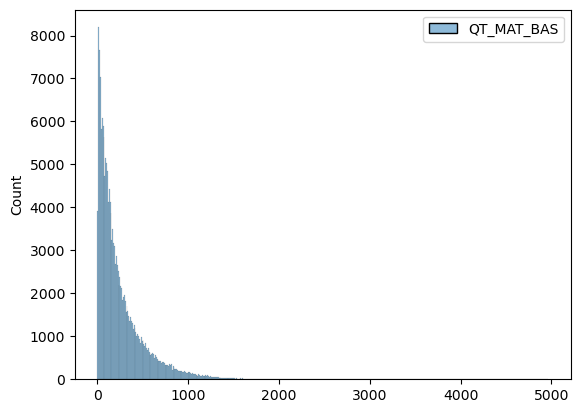

In [396]:
sns.histplot(df[['QT_MAT_BAS']])

In [397]:
df[df['QT_MAT_BAS'] == 0].shape

(0, 177)

In [398]:
temp = ['QT_MAT_INF', 'QT_MAT_FUND', 'QT_MAT_MED', 'QT_MAT_PROF', 'QT_MAT_EJA']

# A grande maioria dos alunos se encontra em apenas uma categoria de ensino de cada vez
display(df[(~df['QT_MAT_BAS'].isna()) & (df['QT_MAT_BAS'] == df[temp].sum(axis = 1))][['QT_MAT_BAS'] + temp].shape)

# Porém, é possível assumir que um mesmo aluno possa estar em duas categorias de ensino ao mesmo tempo
df_teste = df[(~df['QT_MAT_BAS'].isna()) & (df['QT_MAT_BAS'] < df[temp].sum(axis = 1))][['QT_MAT_BAS'] + temp]
display(df_teste.shape)

# O valor de QT_MAT_BAS não supera o valor do somatório das categorias de ensino, reforçando a teoria
display(df[(~df['QT_MAT_BAS'].isna()) & (df['QT_MAT_BAS'] > df[temp].sum(axis = 1))][['QT_MAT_BAS'] + temp].shape)

(170391, 6)

(4940, 6)

(0, 6)

In [399]:
df_teste

,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_EJA
38,1013.0,53.0,706.0,254.0,72.0,0.0
140,127.0,0.0,15.0,0.0,112.0,112.0
375,197.0,0.0,0.0,197.0,197.0,0.0
565,220.0,0.0,0.0,220.0,220.0,0.0
666,579.0,0.0,0.0,579.0,579.0,0.0
...,...,...,...,...,...,...
217217,352.0,0.0,0.0,281.0,352.0,13.0
217310,369.0,0.0,0.0,272.0,369.0,11.0
217428,272.0,0.0,0.0,272.0,272.0,0.0
217452,42.0,0.0,0.0,0.0,42.0,42.0


In [400]:
df.shape

(175331, 177)

In [401]:
cols_remover += cols_matriculas
len(cols_remover)

48

In [402]:
# Removendo escolas com valor ausente na quantidade de matrículas
df = df.dropna(subset=['QT_MAT_BAS'], ignore_index=True)
df['QT_MAT_BAS'].isna().value_counts()

QT_MAT_BAS
False    175331
Name: count, dtype: int64

In [403]:
df[['NO_ENTIDADE', 'CO_UF', 'QT_MAT_BAS']].sort_values(by='QT_MAT_BAS', ascending=False).head(10)

,NO_ENTIDADE,CO_UF,QT_MAT_BAS
149132,INSTITUTO ESTADUAL DE EDUCACAO,42,4965.0
10718,ESCOLA TECNICA ESTADUAL VILHENA ALVES,15,4836.0
132131,PROZ UNIDADE JABAQUARA,35,4527.0
122574,AGOSTINIANO MENDEL COLEGIO,35,4405.0
121116,DANTE ALIGHIERI COLEGIO,35,4331.0
7206,ESCOLA ESTADUAL TEN CORONEL CANDIDO JOSE MARIANO,13,4188.0
82259,ESCOLA SANDOVAL SOARES DE AZEVEDO - ESSA,31,3577.0
117558,LAURO GOMES ETEC,35,3566.0
81793,COLEGIO SANTO AGOSTINHO,31,3512.0
34165,INSTITUTO DOM BARRETO CENTRO,22,3460.0


In [404]:
df[df['QT_MAT_BAS'] == 1].shape

(55, 177)

### Tipo de Escola

#### TP_DEPENDENCIA

- 1 - Federal
- 2 - Estadual
- 3 - Municipal
- 4 - Privada

In [405]:
basic_exploration(df, 'TP_DEPENDENCIA', 'category')


Contagem de valores:


TP_DEPENDENCIA
3    106441
4     40729
2     27569
1       592
Name: count, dtype: int64


Quantidade de valores ausentes


TP_DEPENDENCIA
False    175331
Name: count, dtype: int64

#### TP_CATEGORIA_ESCOLA_PRIVADA

- 1 - Particular
- 2 - Comunitária
- 3 - Confessional
- 4 - Filantrópica

\* Não aplicável para escolas públicas

In [406]:
basic_exploration(df, 'TP_CATEGORIA_ESCOLA_PRIVADA', 'category')


Contagem de valores:


TP_CATEGORIA_ESCOLA_PRIVADA
NaN    134602
1.0     30477
4.0      7650
2.0      2195
3.0       407
Name: count, dtype: int64


Quantidade de valores ausentes


TP_CATEGORIA_ESCOLA_PRIVADA
True     134602
False     40729
Name: count, dtype: int64

In [407]:
df[(df['TP_DEPENDENCIA'] == 4) & (df['TP_CATEGORIA_ESCOLA_PRIVADA'].isna())]

,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,IN_BANHEIRO_CHUVEIRO,IN_BIBLIOTECA,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_DESPENSA,IN_DORMITORIO_ALUNO,IN_DORMITORIO_PROFESSOR,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_EDUC_PROF,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_PISCINA,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_MUSICA_CORAL,IN_SALA_ESTUDIO_DANCA,IN_SALA_MULTIUSO,IN_SALA_ESTUDIO_GRAVACAO,IN_SALA_OFICINAS_EDUC_PROF,IN_SALA_DIRETORIA,IN_SALA_LEITURA,IN_SALA_PROFESSOR,IN_SALA_REPOUSO_ALUNO,IN_SECRETARIA,IN_SALA_ATENDIMENTO_ESPECIAL,IN_TERREIRAO,IN_VIVEIRO,IN_DEPENDENCIAS_OUTRAS,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_SINAL_SONORO,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS_DENTRO,QT_SALAS_UTILIZADAS_FORA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,QT_SALAS_UTILIZADAS_ACESSIVEIS,IN_EQUIP_PARABOLICA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SCANNER,QT_EQUIP_DVD,QT_EQUIP_SOM,QT_EQUIP_TV,QT_EQUIP_LOUSA_DIGITAL,QT_EQUIP_MULTIMIDIA,QT_DESKTOP_ALUNO,QT_COMP_PORTATIL_ALUNO,QT_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,IN_MATERIAL_PED_MULTIMIDIA,IN_MATERIAL_PED_INFANTIL,IN_MATERIAL_PED_CIENTIFICO,IN_MATERIAL_PED_DIFUSAO,IN_MATERIAL_PED_MUSICAL,IN_MATERIAL_PED_JOGOS,IN_MATERIAL_PED_ARTISTICAS,IN_MATERIAL_PED_PROFISSIONAL,IN_MATERIAL_PED_DESPORTIVA,IN_MATERIAL_PED_INDIGENA,IN_MATERIAL_PED_ETNICO,IN_MATERIAL_PED_CAMPO,IN_MATERIAL_PED_BIL_SURDOS,IN_MATERIAL_PED_NENHUM,CO_REGIAO,CO_UF,IN_EAD,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_FUND_AI,QT_MAT_FUND_AI_1,QT_MAT_FUND_AI_2,QT_MAT_FUND_AI_3,QT_MAT_FUND_AI_4,QT_MAT_FUND_AI_5,QT_MAT_FUND_AF,QT_MAT_FUND_AF_6,QT_MAT_FUND_AF_7,QT_MAT_FUND_AF_8,QT_MAT_FUND_AF_9,QT_MAT_MED,QT_MAT_MED_PROP,QT_MAT_MED_PROP_1,QT_MAT_MED_PROP_2,QT_MAT_MED_PROP_3,QT_MAT_MED_PROP_4,QT_MAT_MED_PROP_NS,QT_MAT_MED_CT,QT_MAT_MED_CT_1,QT_MAT_MED_CT_2,QT_MAT_MED_CT_3,QT_MAT_MED_CT_4,QT_MAT_MED_CT_NS,QT_MAT_MED_NM,QT_MAT_MED_NM_1,QT_MAT_MED_NM_2,QT_MAT_MED_NM_3,QT_MAT_MED_NM_4,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_PROF_TEC_CONC,QT_MAT_PROF_TEC_SUBS,QT_MAT_PROF_FIC_CONC,QT_MAT_EJA,QT_MAT_EJA_FUND,QT_MAT_EJA_FUND_AI,QT_MAT_EJA_FUND_AF,QT_MAT_EJA_FUND_FIC,QT_MAT_EJA_MED,QT_MAT_EJA_MED_NPROF,QT_MAT_EJA_MED_FIC,QT_MAT_EJA_MED_TEC


In [408]:
df.loc[(df['TP_DEPENDENCIA'] < 4) & (df['TP_CATEGORIA_ESCOLA_PRIVADA'].isna()), 'TP_CATEGORIA_ESCOLA_PRIVADA'] = -1
df['TP_CATEGORIA_ESCOLA_PRIVADA'].value_counts(dropna=False)

TP_CATEGORIA_ESCOLA_PRIVADA
-1.0    134602
 1.0     30477
 4.0      7650
 2.0      2195
 3.0       407
Name: count, dtype: int64

### Local da Escola

#### TP_LOCALIZACAO

- 1 - Urbana
- 2 - Rural

In [409]:
basic_exploration(df, 'TP_LOCALIZACAO', 'category')


Contagem de valores:


TP_LOCALIZACAO
1    123673
2     51658
Name: count, dtype: int64


Quantidade de valores ausentes


TP_LOCALIZACAO
False    175331
Name: count, dtype: int64

#### TP_LOCALIZACAO_DIFERENCIADA

- 0 - A escola não está em área de localização diferenciada
- 1 - Área de assentamento
- 2 - Terra indígena
- 3 - Área onde se localiza comunidade remanescente de quilombos
- 8 - Área onde se localizam povos e comunidades tradicionais

In [410]:
basic_exploration(df, 'TP_LOCALIZACAO_DIFERENCIADA', 'category')


Contagem de valores:


TP_LOCALIZACAO_DIFERENCIADA
0.0    163847
1.0      4539
2.0      3587
3.0      2592
8.0       766
Name: count, dtype: int64


Quantidade de valores ausentes


TP_LOCALIZACAO_DIFERENCIADA
False    175331
Name: count, dtype: int64

#### IN_LOCAL_FUNC_PREDIO_ESCOLAR

- 1 - Sim
- 0 - Não


In [411]:
basic_exploration(df, 'IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_PREDIO_ESCOLAR
1.0    171361
0.0      3970
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_PREDIO_ESCOLAR
False    175331
Name: count, dtype: int64

#### TP_OCUPACAO_PREDIO_ESCOLAR

- 1 - Próprio
- 2 - Alugado
- 3 - Cedido

\* Não aplicável para escolas que não ocupam prédio escolar

In [412]:
basic_exploration(df, 'TP_OCUPACAO_PREDIO_ESCOLAR', 'category')


Contagem de valores:


TP_OCUPACAO_PREDIO_ESCOLAR
1.0    139366
2.0     21118
3.0     10877
NaN      3970
Name: count, dtype: int64


Quantidade de valores ausentes


TP_OCUPACAO_PREDIO_ESCOLAR
False    171361
True       3970
Name: count, dtype: int64

In [413]:
df[(df['TP_OCUPACAO_PREDIO_ESCOLAR'].isna()) & (df['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 1)]

,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,IN_BANHEIRO_CHUVEIRO,IN_BIBLIOTECA,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_DESPENSA,IN_DORMITORIO_ALUNO,IN_DORMITORIO_PROFESSOR,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_EDUC_PROF,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_PISCINA,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_MUSICA_CORAL,IN_SALA_ESTUDIO_DANCA,IN_SALA_MULTIUSO,IN_SALA_ESTUDIO_GRAVACAO,IN_SALA_OFICINAS_EDUC_PROF,IN_SALA_DIRETORIA,IN_SALA_LEITURA,IN_SALA_PROFESSOR,IN_SALA_REPOUSO_ALUNO,IN_SECRETARIA,IN_SALA_ATENDIMENTO_ESPECIAL,IN_TERREIRAO,IN_VIVEIRO,IN_DEPENDENCIAS_OUTRAS,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_SINAL_SONORO,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS_DENTRO,QT_SALAS_UTILIZADAS_FORA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,QT_SALAS_UTILIZADAS_ACESSIVEIS,IN_EQUIP_PARABOLICA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SCANNER,QT_EQUIP_DVD,QT_EQUIP_SOM,QT_EQUIP_TV,QT_EQUIP_LOUSA_DIGITAL,QT_EQUIP_MULTIMIDIA,QT_DESKTOP_ALUNO,QT_COMP_PORTATIL_ALUNO,QT_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,IN_MATERIAL_PED_MULTIMIDIA,IN_MATERIAL_PED_INFANTIL,IN_MATERIAL_PED_CIENTIFICO,IN_MATERIAL_PED_DIFUSAO,IN_MATERIAL_PED_MUSICAL,IN_MATERIAL_PED_JOGOS,IN_MATERIAL_PED_ARTISTICAS,IN_MATERIAL_PED_PROFISSIONAL,IN_MATERIAL_PED_DESPORTIVA,IN_MATERIAL_PED_INDIGENA,IN_MATERIAL_PED_ETNICO,IN_MATERIAL_PED_CAMPO,IN_MATERIAL_PED_BIL_SURDOS,IN_MATERIAL_PED_NENHUM,CO_REGIAO,CO_UF,IN_EAD,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_FUND_AI,QT_MAT_FUND_AI_1,QT_MAT_FUND_AI_2,QT_MAT_FUND_AI_3,QT_MAT_FUND_AI_4,QT_MAT_FUND_AI_5,QT_MAT_FUND_AF,QT_MAT_FUND_AF_6,QT_MAT_FUND_AF_7,QT_MAT_FUND_AF_8,QT_MAT_FUND_AF_9,QT_MAT_MED,QT_MAT_MED_PROP,QT_MAT_MED_PROP_1,QT_MAT_MED_PROP_2,QT_MAT_MED_PROP_3,QT_MAT_MED_PROP_4,QT_MAT_MED_PROP_NS,QT_MAT_MED_CT,QT_MAT_MED_CT_1,QT_MAT_MED_CT_2,QT_MAT_MED_CT_3,QT_MAT_MED_CT_4,QT_MAT_MED_CT_NS,QT_MAT_MED_NM,QT_MAT_MED_NM_1,QT_MAT_MED_NM_2,QT_MAT_MED_NM_3,QT_MAT_MED_NM_4,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_PROF_TEC_CONC,QT_MAT_PROF_TEC_SUBS,QT_MAT_PROF_FIC_CONC,QT_MAT_EJA,QT_MAT_EJA_FUND,QT_MAT_EJA_FUND_AI,QT_MAT_EJA_FUND_AF,QT_MAT_EJA_FUND_FIC,QT_MAT_EJA_MED,QT_MAT_EJA_MED_NPROF,QT_MAT_EJA_MED_FIC,QT_MAT_EJA_MED_TEC


In [414]:
df.loc[df['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 0, 'TP_OCUPACAO_PREDIO_ESCOLAR'] = -1
df[['IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'TP_OCUPACAO_PREDIO_ESCOLAR']].value_counts(dropna = False)

IN_LOCAL_FUNC_PREDIO_ESCOLAR  TP_OCUPACAO_PREDIO_ESCOLAR
1.0                            1.0                          139366
                               2.0                           21118
                               3.0                           10877
0.0                           -1.0                            3970
Name: count, dtype: int64

#### IN_LOCAL_FUNC_SOCIOEDUCATIVO

- 1 - Sim
- 0 - Não

In [415]:
basic_exploration(df, 'IN_LOCAL_FUNC_SOCIOEDUCATIVO', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_SOCIOEDUCATIVO
0.0    175110
1.0       221
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_SOCIOEDUCATIVO
False    175331
Name: count, dtype: int64

#### IN_LOCAL_FUNC_UNID_PRISIONAL

- 1 - Sim
- 0 - Não


In [416]:
basic_exploration(df, 'IN_LOCAL_FUNC_UNID_PRISIONAL', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_UNID_PRISIONAL
0.0    174798
1.0       533
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_UNID_PRISIONAL
False    175331
Name: count, dtype: int64

#### IN_LOCAL_FUNC_PRISIONAL_SOCIO

- 1 - Sim
- 0 - Não


In [417]:
basic_exploration(df, 'IN_LOCAL_FUNC_PRISIONAL_SOCIO', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_PRISIONAL_SOCIO
0.0    174595
1.0       736
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_PRISIONAL_SOCIO
False    175331
Name: count, dtype: int64

#### IN_LOCAL_FUNC_GALPAO

- 1 - Sim
- 0 - Não


In [418]:
basic_exploration(df, 'IN_LOCAL_FUNC_GALPAO', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_GALPAO
0.0    172886
1.0      2445
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_GALPAO
False    175331
Name: count, dtype: int64

#### IN_LOCAL_FUNC_SALAS_OUTRA_ESC

- 1 - Sim
- 0 - Não


In [419]:
basic_exploration(df, 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_SALAS_OUTRA_ESC
0.0    169790
1.0      5541
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_SALAS_OUTRA_ESC
False    175331
Name: count, dtype: int64

#### IN_LOCAL_FUNC_OUTROS

- 1 - Sim
- 0 - Não


In [420]:
basic_exploration(df, 'IN_LOCAL_FUNC_OUTROS', 'binary')


Contagem de valores:


IN_LOCAL_FUNC_OUTROS
0.0    164642
1.0     10689
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LOCAL_FUNC_OUTROS
False    175331
Name: count, dtype: int64

#### IN_PREDIO_COMPARTILHADO

- 0 - Não
- 1 - Sim

\* Não aplicável para escolas que não ocupam prédio escolar

In [421]:
basic_exploration(df, 'IN_PREDIO_COMPARTILHADO', 'binary')


Contagem de valores:


IN_PREDIO_COMPARTILHADO
0.0    163423
1.0      7938
NaN      3970
Name: count, dtype: int64


Quantidade de valores ausentes


IN_PREDIO_COMPARTILHADO
False    171361
True       3970
Name: count, dtype: int64

In [422]:
df[['IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'TP_OCUPACAO_PREDIO_ESCOLAR', 'IN_PREDIO_COMPARTILHADO']].value_counts(dropna = False)

IN_LOCAL_FUNC_PREDIO_ESCOLAR  TP_OCUPACAO_PREDIO_ESCOLAR  IN_PREDIO_COMPARTILHADO
1.0                            1.0                        0.0                        132966
                               2.0                        0.0                         20725
                               3.0                        0.0                          9732
                               1.0                        1.0                          6400
0.0                           -1.0                        NaN                          3970
1.0                            3.0                        1.0                          1145
                               2.0                        1.0                           393
Name: count, dtype: int64

In [423]:
df.loc[df['IN_LOCAL_FUNC_PREDIO_ESCOLAR'] == 0, 'IN_PREDIO_COMPARTILHADO'] = -1
df[['IN_LOCAL_FUNC_PREDIO_ESCOLAR', 'TP_OCUPACAO_PREDIO_ESCOLAR', 'IN_PREDIO_COMPARTILHADO']].value_counts(dropna = False)

IN_LOCAL_FUNC_PREDIO_ESCOLAR  TP_OCUPACAO_PREDIO_ESCOLAR  IN_PREDIO_COMPARTILHADO
1.0                            1.0                         0.0                       132966
                               2.0                         0.0                        20725
                               3.0                         0.0                         9732
                               1.0                         1.0                         6400
0.0                           -1.0                        -1.0                         3970
1.0                            3.0                         1.0                         1145
                               2.0                         1.0                          393
Name: count, dtype: int64

### Abastecimento de Água

#### IN_AGUA_POTAVEL

- 1 - Sim
- 0 - Não


In [424]:
basic_exploration(df, 'IN_AGUA_POTAVEL', 'binary')


Contagem de valores:


IN_AGUA_POTAVEL
1.0    167493
0.0      7838
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AGUA_POTAVEL
False    175331
Name: count, dtype: int64

#### IN_AGUA_REDE_PUBLICA

- 1 - Sim
- 0 - Não


In [425]:
basic_exploration(df, 'IN_AGUA_REDE_PUBLICA', 'binary')


Contagem de valores:


IN_AGUA_REDE_PUBLICA
1.0    134741
0.0     40590
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AGUA_REDE_PUBLICA
False    175331
Name: count, dtype: int64

#### IN_AGUA_POCO_ARTESIANO

- 1 - Sim
- 0 - Não


In [426]:
basic_exploration(df, 'IN_AGUA_POCO_ARTESIANO', 'binary')


Contagem de valores:


IN_AGUA_POCO_ARTESIANO
0.0    147174
1.0     28157
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AGUA_POCO_ARTESIANO
False    175331
Name: count, dtype: int64

#### IN_AGUA_CACIMBA

- 1 - Sim
- 0 - Não


In [427]:
basic_exploration(df, 'IN_AGUA_CACIMBA', 'binary')


Contagem de valores:


IN_AGUA_CACIMBA
0.0    160065
1.0     15266
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AGUA_CACIMBA
False    175331
Name: count, dtype: int64

#### IN_AGUA_FONTE_RIO

- 1 - Sim
- 0 - Não


In [428]:
basic_exploration(df, 'IN_AGUA_FONTE_RIO', 'binary')


Contagem de valores:


IN_AGUA_FONTE_RIO
0.0    168415
1.0      6916
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AGUA_FONTE_RIO
False    175331
Name: count, dtype: int64

#### IN_AGUA_INEXISTENTE

- 1 - Sim
- 0 - Não


In [429]:
basic_exploration(df, 'IN_AGUA_INEXISTENTE', 'binary')


Contagem de valores:


IN_AGUA_INEXISTENTE
0.0    172281
1.0      3050
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AGUA_INEXISTENTE
False    175331
Name: count, dtype: int64

#### Comparação

In [430]:
cols_agua = ['IN_AGUA_POTAVEL', 'IN_AGUA_REDE_PUBLICA', 'IN_AGUA_POCO_ARTESIANO', 'IN_AGUA_CACIMBA', 'IN_AGUA_FONTE_RIO', 'IN_AGUA_INEXISTENTE']

df[cols_agua].value_counts(dropna = False)

IN_AGUA_POTAVEL  IN_AGUA_REDE_PUBLICA  IN_AGUA_POCO_ARTESIANO  IN_AGUA_CACIMBA  IN_AGUA_FONTE_RIO  IN_AGUA_INEXISTENTE
1.0              1.0                   0.0                     0.0              0.0                0.0                    121340
                 0.0                   1.0                     0.0              0.0                0.0                     18786
                                       0.0                     1.0              0.0                0.0                      9079
                 1.0                   1.0                     0.0              0.0                0.0                      6394
                 0.0                   0.0                     0.0              1.0                0.0                      4536
                 1.0                   0.0                     1.0              0.0                0.0                      3756
0.0              1.0                   0.0                     0.0              0.0                0.0     

### Abastecimento de Energia Elétrica

#### IN_ENERGIA_REDE_PUBLICA

- 1 - Sim
- 0 - Não


In [431]:
basic_exploration(df, 'IN_ENERGIA_REDE_PUBLICA', 'binary')


Contagem de valores:


IN_ENERGIA_REDE_PUBLICA
1.0    169707
0.0      5624
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ENERGIA_REDE_PUBLICA
False    175331
Name: count, dtype: int64

#### IN_ENERGIA_GERADOR_FOSSIL

- 1 - Sim
- 0 - Não


In [432]:
basic_exploration(df, 'IN_ENERGIA_GERADOR_FOSSIL', 'binary')


Contagem de valores:


IN_ENERGIA_GERADOR_FOSSIL
0.0    173355
1.0      1976
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ENERGIA_GERADOR_FOSSIL
False    175331
Name: count, dtype: int64

#### IN_ENERGIA_RENOVAVEL

- 1 - Sim
- 0 - Não


In [433]:
basic_exploration(df, 'IN_ENERGIA_RENOVAVEL', 'binary')


Contagem de valores:


IN_ENERGIA_RENOVAVEL
0.0    171317
1.0      4014
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ENERGIA_RENOVAVEL
False    175331
Name: count, dtype: int64

#### IN_ENERGIA_INEXISTENTE

- 1 - Sim
- 0 - Não


In [434]:
basic_exploration(df, 'IN_ENERGIA_INEXISTENTE', 'binary')


Contagem de valores:


IN_ENERGIA_INEXISTENTE
0.0    172746
1.0      2585
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ENERGIA_INEXISTENTE
False    175331
Name: count, dtype: int64

#### Comparação

In [435]:
cols_agua = ['IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR_FOSSIL', 'IN_ENERGIA_RENOVAVEL', 'IN_ENERGIA_INEXISTENTE']

df[cols_agua].value_counts(dropna = False)

IN_ENERGIA_REDE_PUBLICA  IN_ENERGIA_GERADOR_FOSSIL  IN_ENERGIA_RENOVAVEL  IN_ENERGIA_INEXISTENTE
1.0                      0.0                        0.0                   0.0                       166859
0.0                      0.0                        0.0                   1.0                         2585
1.0                      0.0                        1.0                   0.0                         2481
0.0                      1.0                        0.0                   0.0                         1554
                         0.0                        1.0                   0.0                         1430
1.0                      1.0                        0.0                   0.0                          319
0.0                      1.0                        1.0                   0.0                           55
1.0                      1.0                        1.0                   0.0                           48
Name: count, dtype: int64

### Esgoto Sanitário

#### IN_ESGOTO_REDE_PUBLICA

- 1 - Sim
- 0 - Não


In [436]:
basic_exploration(df, 'IN_ESGOTO_REDE_PUBLICA', 'binary')


Contagem de valores:


IN_ESGOTO_REDE_PUBLICA
1.0    99281
0.0    76050
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ESGOTO_REDE_PUBLICA
False    175331
Name: count, dtype: int64

#### IN_ESGOTO_FOSSA_SEPTICA

- 1 - Sim
- 0 - Não


In [437]:
basic_exploration(df, 'IN_ESGOTO_FOSSA_SEPTICA', 'binary')


Contagem de valores:


IN_ESGOTO_FOSSA_SEPTICA
0.0    134467
1.0     40864
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ESGOTO_FOSSA_SEPTICA
False    175331
Name: count, dtype: int64

#### IN_ESGOTO_FOSSA_COMUM

- 1 - Sim
- 0 - Não


In [438]:
basic_exploration(df, 'IN_ESGOTO_FOSSA_COMUM', 'binary')


Contagem de valores:


IN_ESGOTO_FOSSA_COMUM
0.0    143010
1.0     32321
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ESGOTO_FOSSA_COMUM
False    175331
Name: count, dtype: int64

#### IN_ESGOTO_FOSSA

- 1 - Sim
- 0 - Não


In [439]:
basic_exploration(df, 'IN_ESGOTO_FOSSA', 'binary')


Contagem de valores:


IN_ESGOTO_FOSSA
0.0    102146
1.0     73185
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ESGOTO_FOSSA
False    175331
Name: count, dtype: int64

In [440]:
cols_remover += ['IN_ESGOTO_FOSSA']
cols_remover[-1]

'IN_ESGOTO_FOSSA'

#### IN_ESGOTO_INEXISTENTE

- 1 - Sim
- 0 - Não


In [441]:
basic_exploration(df, 'IN_ESGOTO_INEXISTENTE', 'binary')


Contagem de valores:


IN_ESGOTO_INEXISTENTE
0.0    168986
1.0      6345
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ESGOTO_INEXISTENTE
False    175331
Name: count, dtype: int64

#### Comparação

In [442]:
cols_esgoto = ['IN_ESGOTO_REDE_PUBLICA', 'IN_ESGOTO_FOSSA_SEPTICA', 'IN_ESGOTO_FOSSA_COMUM', 'IN_ESGOTO_FOSSA', 'IN_ESGOTO_INEXISTENTE']

df[cols_esgoto].value_counts(dropna = False)

IN_ESGOTO_REDE_PUBLICA  IN_ESGOTO_FOSSA_SEPTICA  IN_ESGOTO_FOSSA_COMUM  IN_ESGOTO_FOSSA  IN_ESGOTO_INEXISTENTE
1.0                     0.0                      0.0                    0.0              0.0                      95801
0.0                     1.0                      0.0                    1.0              0.0                      38363
                        0.0                      1.0                    1.0              0.0                      31342
                                                 0.0                    0.0              1.0                       6345
1.0                     1.0                      0.0                    1.0              0.0                       2501
                        0.0                      1.0                    1.0              0.0                        979
Name: count, dtype: int64

### Destinação do Lixo

#### IN_LIXO_SERVICO_COLETA

- 1 - Sim
- 0 - Não


In [443]:
basic_exploration(df, 'IN_LIXO_SERVICO_COLETA', 'binary')


Contagem de valores:


IN_LIXO_SERVICO_COLETA
1.0    144915
0.0     30416
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LIXO_SERVICO_COLETA
False    175331
Name: count, dtype: int64

#### IN_LIXO_QUEIMA

- 1 - Sim
- 0 - Não


In [444]:
basic_exploration(df, 'IN_LIXO_QUEIMA', 'binary')


Contagem de valores:


IN_LIXO_QUEIMA
0.0    145664
1.0     29667
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LIXO_QUEIMA
False    175331
Name: count, dtype: int64

#### IN_LIXO_ENTERRA

- 1 - Sim
- 0 - Não


In [445]:
basic_exploration(df, 'IN_LIXO_ENTERRA', 'binary')


Contagem de valores:


IN_LIXO_ENTERRA
0.0    171121
1.0      4210
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LIXO_ENTERRA
False    175331
Name: count, dtype: int64

#### IN_LIXO_DESTINO_FINAL_PUBLICO

- 1 - Sim
- 0 - Não


In [446]:
basic_exploration(df, 'IN_LIXO_DESTINO_FINAL_PUBLICO', 'binary')


Contagem de valores:


IN_LIXO_DESTINO_FINAL_PUBLICO
0.0    171244
1.0      4087
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LIXO_DESTINO_FINAL_PUBLICO
False    175331
Name: count, dtype: int64

#### IN_LIXO_DESCARTA_OUTRA_AREA

- 1 - Sim
- 0 - Não


In [447]:
basic_exploration(df, 'IN_LIXO_DESCARTA_OUTRA_AREA', 'binary')


Contagem de valores:


IN_LIXO_DESCARTA_OUTRA_AREA
0.0    168790
1.0      6541
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LIXO_DESCARTA_OUTRA_AREA
False    175331
Name: count, dtype: int64

#### Comparação

In [448]:
cols_lixo = ['IN_LIXO_SERVICO_COLETA', 'IN_LIXO_QUEIMA', 'IN_LIXO_ENTERRA', 'IN_LIXO_DESTINO_FINAL_PUBLICO', 'IN_LIXO_DESCARTA_OUTRA_AREA']

df[cols_lixo].value_counts(dropna = False)

IN_LIXO_SERVICO_COLETA  IN_LIXO_QUEIMA  IN_LIXO_ENTERRA  IN_LIXO_DESTINO_FINAL_PUBLICO  IN_LIXO_DESCARTA_OUTRA_AREA
1.0                     0.0             0.0              0.0                            0.0                            137667
0.0                     1.0             0.0              0.0                            0.0                             21205
                                                                                        1.0                              2813
1.0                     0.0             0.0              1.0                            0.0                              2639
0.0                     1.0             1.0              0.0                            0.0                              2454
1.0                     1.0             0.0              0.0                            0.0                              2316
0.0                     0.0             0.0              0.0                            1.0                              1653
1.

### Dependências Físicas Existentes e Utilizadas na Escola

#### IN_ALMOXARIFADO

- 1 - Sim
- 0 - Não


In [449]:
basic_exploration(df, 'IN_ALMOXARIFADO', 'binary')


Contagem de valores:


IN_ALMOXARIFADO
1.0    88259
0.0    87072
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ALMOXARIFADO
False    175331
Name: count, dtype: int64

#### IN_AREA_VERDE

- 1 - Sim
- 0 - Não


In [450]:
basic_exploration(df, 'IN_AREA_VERDE', 'binary')


Contagem de valores:


IN_AREA_VERDE
0.0    113322
1.0     62009
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AREA_VERDE
False    175331
Name: count, dtype: int64

#### IN_AUDITORIO

- 1 - Sim
- 0 - Não


In [451]:
basic_exploration(df, 'IN_AUDITORIO', 'binary')


Contagem de valores:


IN_AUDITORIO
0.0    154149
1.0     21182
Name: count, dtype: int64


Quantidade de valores ausentes


IN_AUDITORIO
False    175331
Name: count, dtype: int64

#### IN_BANHEIRO

- 1 - Sim
- 0 - Não


In [452]:
basic_exploration(df, 'IN_BANHEIRO', 'binary')


Contagem de valores:


IN_BANHEIRO
1.0    170389
0.0      4942
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BANHEIRO
False    175331
Name: count, dtype: int64

#### IN_BANHEIRO_EI

- 1 - Sim
- 0 - Não


In [453]:
basic_exploration(df, 'IN_BANHEIRO_EI', 'binary')


Contagem de valores:


IN_BANHEIRO_EI
0.0    104080
1.0     71251
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BANHEIRO_EI
False    175331
Name: count, dtype: int64

#### IN_BANHEIRO_PNE

- 1 - Sim
- 0 - Não


In [454]:
basic_exploration(df, 'IN_BANHEIRO_PNE', 'binary')


Contagem de valores:


IN_BANHEIRO_PNE
1.0    91942
0.0    83389
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BANHEIRO_PNE
False    175331
Name: count, dtype: int64

#### IN_BANHEIRO_FUNCIONARIOS

- 1 - Sim
- 0 - Não


In [455]:
basic_exploration(df, 'IN_BANHEIRO_FUNCIONARIOS', 'binary')


Contagem de valores:


IN_BANHEIRO_FUNCIONARIOS
1.0    105390
0.0     69941
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BANHEIRO_FUNCIONARIOS
False    175331
Name: count, dtype: int64

#### IN_BANHEIRO_CHUVEIRO

- 1 - Sim
- 0 - Não


In [456]:
basic_exploration(df, 'IN_BANHEIRO_CHUVEIRO', 'binary')


Contagem de valores:


IN_BANHEIRO_CHUVEIRO
0.0    98085
1.0    77246
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BANHEIRO_CHUVEIRO
False    175331
Name: count, dtype: int64

#### IN_BIBLIOTECA

- 1 - Sim
- 0 - Não


In [457]:
basic_exploration(df, 'IN_BIBLIOTECA', 'binary')


Contagem de valores:


IN_BIBLIOTECA
0.0    111140
1.0     64191
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BIBLIOTECA
False    175331
Name: count, dtype: int64

#### IN_BIBLIOTECA_SALA_LEITURA -> Remover

- 1 - Sim
- 0 - Não


In [458]:
basic_exploration(df, 'IN_BIBLIOTECA_SALA_LEITURA', 'binary')


Contagem de valores:


IN_BIBLIOTECA_SALA_LEITURA
1.0    91033
0.0    84298
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BIBLIOTECA_SALA_LEITURA
False    175331
Name: count, dtype: int64

#### IN_COZINHA

- 1 - Sim
- 0 - Não


In [459]:
basic_exploration(df, 'IN_COZINHA', 'binary')


Contagem de valores:


IN_COZINHA
1.0    162456
0.0     12875
Name: count, dtype: int64


Quantidade de valores ausentes


IN_COZINHA
False    175331
Name: count, dtype: int64

#### IN_DESPENSA

- 1 - Sim
- 0 - Não


In [460]:
basic_exploration(df, 'IN_DESPENSA', 'binary')


Contagem de valores:


IN_DESPENSA
1.0    117999
0.0     57332
Name: count, dtype: int64


Quantidade de valores ausentes


IN_DESPENSA
False    175331
Name: count, dtype: int64

#### IN_DORMITORIO_ALUNO

- 1 - Sim
- 0 - Não


In [461]:
basic_exploration(df, 'IN_DORMITORIO_ALUNO', 'binary')


Contagem de valores:


IN_DORMITORIO_ALUNO
0.0    170177
1.0      5154
Name: count, dtype: int64


Quantidade de valores ausentes


IN_DORMITORIO_ALUNO
False    175331
Name: count, dtype: int64

#### IN_DORMITORIO_PROFESSOR

- 1 - Sim
- 0 - Não


In [462]:
basic_exploration(df, 'IN_DORMITORIO_PROFESSOR', 'binary')


Contagem de valores:


IN_DORMITORIO_PROFESSOR
0.0    173274
1.0      2057
Name: count, dtype: int64


Quantidade de valores ausentes


IN_DORMITORIO_PROFESSOR
False    175331
Name: count, dtype: int64

#### IN_LABORATORIO_CIENCIAS

- 1 - Sim
- 0 - Não


In [463]:
basic_exploration(df, 'IN_LABORATORIO_CIENCIAS', 'binary')


Contagem de valores:


IN_LABORATORIO_CIENCIAS
0.0    153621
1.0     21710
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LABORATORIO_CIENCIAS
False    175331
Name: count, dtype: int64

#### IN_LABORATORIO_INFORMATICA

- 1 - Sim
- 0 - Não


In [464]:
basic_exploration(df, 'IN_LABORATORIO_INFORMATICA', 'binary')


Contagem de valores:


IN_LABORATORIO_INFORMATICA
0.0    124036
1.0     51295
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LABORATORIO_INFORMATICA
False    175331
Name: count, dtype: int64

#### IN_LABORATORIO_EDUC_PROF

- 1 - Sim
- 0 - Não


In [465]:
basic_exploration(df, 'IN_LABORATORIO_EDUC_PROF', 'binary')


Contagem de valores:


IN_LABORATORIO_EDUC_PROF
0.0    172709
1.0      2622
Name: count, dtype: int64


Quantidade de valores ausentes


IN_LABORATORIO_EDUC_PROF
False    175331
Name: count, dtype: int64

#### IN_PATIO_COBERTO

- 1 - Sim
- 0 - Não


In [466]:
basic_exploration(df, 'IN_PATIO_COBERTO', 'binary')


Contagem de valores:


IN_PATIO_COBERTO
1.0    99497
0.0    75834
Name: count, dtype: int64


Quantidade de valores ausentes


IN_PATIO_COBERTO
False    175331
Name: count, dtype: int64

#### IN_PATIO_DESCOBERTO

- 1 - Sim
- 0 - Não


In [467]:
basic_exploration(df, 'IN_PATIO_DESCOBERTO', 'binary')


Contagem de valores:


IN_PATIO_DESCOBERTO
0.0    90240
1.0    85091
Name: count, dtype: int64


Quantidade de valores ausentes


IN_PATIO_DESCOBERTO
False    175331
Name: count, dtype: int64

#### IN_PARQUE_INFANTIL

- 1 - Sim
- 0 - Não


In [468]:
basic_exploration(df, 'IN_PARQUE_INFANTIL', 'binary')


Contagem de valores:


IN_PARQUE_INFANTIL
0.0    109677
1.0     65654
Name: count, dtype: int64


Quantidade de valores ausentes


IN_PARQUE_INFANTIL
False    175331
Name: count, dtype: int64

#### IN_PISCINA

- 1 - Sim
- 0 - Não


In [469]:
basic_exploration(df, 'IN_PISCINA', 'binary')


Contagem de valores:


IN_PISCINA
0.0    170614
1.0      4717
Name: count, dtype: int64


Quantidade de valores ausentes


IN_PISCINA
False    175331
Name: count, dtype: int64

#### IN_QUADRA_ESPORTES

- 1 - Sim
- 0 - Não


In [470]:
basic_exploration(df, 'IN_QUADRA_ESPORTES', 'binary')


Contagem de valores:


IN_QUADRA_ESPORTES
0.0    109444
1.0     65887
Name: count, dtype: int64


Quantidade de valores ausentes


IN_QUADRA_ESPORTES
False    175331
Name: count, dtype: int64

In [471]:
cols_remover += ['IN_QUADRA_ESPORTES']
cols_remover[-1]

'IN_QUADRA_ESPORTES'

#### IN_QUADRA_ESPORTES_COBERTA

- 1 - Sim
- 0 - Não


In [472]:
basic_exploration(df, 'IN_QUADRA_ESPORTES_COBERTA', 'binary')


Contagem de valores:


IN_QUADRA_ESPORTES_COBERTA
0.0    126498
1.0     48833
Name: count, dtype: int64


Quantidade de valores ausentes


IN_QUADRA_ESPORTES_COBERTA
False    175331
Name: count, dtype: int64

#### IN_QUADRA_ESPORTES_DESCOBERTA

- 1 - Sim
- 0 - Não


In [473]:
basic_exploration(df, 'IN_QUADRA_ESPORTES_DESCOBERTA', 'binary')


Contagem de valores:


IN_QUADRA_ESPORTES_DESCOBERTA
0.0    150275
1.0     25056
Name: count, dtype: int64


Quantidade de valores ausentes


IN_QUADRA_ESPORTES_DESCOBERTA
False    175331
Name: count, dtype: int64

#### IN_REFEITORIO

- 1 - Sim
- 0 - Não


In [474]:
basic_exploration(df, 'IN_REFEITORIO', 'binary')


Contagem de valores:


IN_REFEITORIO
1.0    90794
0.0    84537
Name: count, dtype: int64


Quantidade de valores ausentes


IN_REFEITORIO
False    175331
Name: count, dtype: int64

#### IN_SALA_ATELIE_ARTES

- 1 - Sim
- 0 - Não


In [475]:
basic_exploration(df, 'IN_SALA_ATELIE_ARTES', 'binary')


Contagem de valores:


IN_SALA_ATELIE_ARTES
0.0    166935
1.0      8396
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_ATELIE_ARTES
False    175331
Name: count, dtype: int64

#### IN_SALA_MUSICA_CORAL

- 1 - Sim
- 0 - Não


In [476]:
basic_exploration(df, 'IN_SALA_MUSICA_CORAL', 'binary')


Contagem de valores:


IN_SALA_MUSICA_CORAL
0.0    171209
1.0      4122
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_MUSICA_CORAL
False    175331
Name: count, dtype: int64

#### IN_SALA_ESTUDIO_DANCA

- 1 - Sim
- 0 - Não


In [477]:
basic_exploration(df, 'IN_SALA_ESTUDIO_DANCA', 'binary')


Contagem de valores:


IN_SALA_ESTUDIO_DANCA
0.0    172173
1.0      3158
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_ESTUDIO_DANCA
False    175331
Name: count, dtype: int64

#### IN_SALA_MULTIUSO

- 1 - Sim
- 0 - Não


In [478]:
basic_exploration(df, 'IN_SALA_MULTIUSO', 'binary')


Contagem de valores:


IN_SALA_MULTIUSO
0.0    158303
1.0     17028
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_MULTIUSO
False    175331
Name: count, dtype: int64

#### IN_SALA_ESTUDIO_GRAVACAO

- 1 - Sim
- 0 - Não


In [479]:
basic_exploration(df, 'IN_SALA_ESTUDIO_GRAVACAO', 'binary')


Contagem de valores:


IN_SALA_ESTUDIO_GRAVACAO
0.0    174821
1.0       510
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_ESTUDIO_GRAVACAO
False    175331
Name: count, dtype: int64

#### IN_SALA_OFICINAS_EDUC_PROF

- 1 - Sim
- 0 - Não


In [480]:
basic_exploration(df, 'IN_SALA_OFICINAS_EDUC_PROF', 'binary')


Contagem de valores:


IN_SALA_OFICINAS_EDUC_PROF
0.0    174116
1.0      1215
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_OFICINAS_EDUC_PROF
False    175331
Name: count, dtype: int64

#### IN_SALA_DIRETORIA

- 1 - Sim
- 0 - Não


In [481]:
basic_exploration(df, 'IN_SALA_DIRETORIA', 'binary')


Contagem de valores:


IN_SALA_DIRETORIA
1.0    127663
0.0     47668
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_DIRETORIA
False    175331
Name: count, dtype: int64

#### IN_SALA_LEITURA

- 1 - Sim
- 0 - Não


In [482]:
basic_exploration(df, 'IN_SALA_LEITURA', 'binary')


Contagem de valores:


IN_SALA_LEITURA
0.0    128520
1.0     46811
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_LEITURA
False    175331
Name: count, dtype: int64

#### IN_SALA_PROFESSOR

- 1 - Sim
- 0 - Não


In [483]:
basic_exploration(df, 'IN_SALA_PROFESSOR', 'binary')


Contagem de valores:


IN_SALA_PROFESSOR
1.0    112216
0.0     63115
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_PROFESSOR
False    175331
Name: count, dtype: int64

#### IN_SALA_REPOUSO_ALUNO

- 1 - Sim
- 0 - Não


In [484]:
basic_exploration(df, 'IN_SALA_REPOUSO_ALUNO', 'binary')


Contagem de valores:


IN_SALA_REPOUSO_ALUNO
0.0    166710
1.0      8621
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_REPOUSO_ALUNO
False    175331
Name: count, dtype: int64

#### IN_SECRETARIA

- 1 - Sim
- 0 - Não


In [485]:
basic_exploration(df, 'IN_SECRETARIA', 'binary')


Contagem de valores:


IN_SECRETARIA
1.0    130206
0.0     45125
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SECRETARIA
False    175331
Name: count, dtype: int64

#### IN_SALA_ATENDIMENTO_ESPECIAL

- 1 - Sim
- 0 - Não


In [486]:
basic_exploration(df, 'IN_SALA_ATENDIMENTO_ESPECIAL', 'binary')


Contagem de valores:


IN_SALA_ATENDIMENTO_ESPECIAL
0.0    135427
1.0     39904
Name: count, dtype: int64


Quantidade de valores ausentes


IN_SALA_ATENDIMENTO_ESPECIAL
False    175331
Name: count, dtype: int64

#### IN_TERREIRAO

- 1 - Sim
- 0 - Não


In [487]:
basic_exploration(df, 'IN_TERREIRAO', 'binary')


Contagem de valores:


IN_TERREIRAO
0.0    154003
1.0     21328
Name: count, dtype: int64


Quantidade de valores ausentes


IN_TERREIRAO
False    175331
Name: count, dtype: int64

#### IN_VIVEIRO

- 1 - Sim
- 0 - Não


In [488]:
basic_exploration(df, 'IN_VIVEIRO', 'binary')


Contagem de valores:


IN_VIVEIRO
0.0    173687
1.0      1644
Name: count, dtype: int64


Quantidade de valores ausentes


IN_VIVEIRO
False    175331
Name: count, dtype: int64

#### IN_DEPENDENCIAS_OUTRAS

- 1 - Sim
- 0 - Não


In [489]:
basic_exploration(df, 'IN_DEPENDENCIAS_OUTRAS', 'binary')


Contagem de valores:


IN_DEPENDENCIAS_OUTRAS
0.0    173551
1.0      1780
Name: count, dtype: int64


Quantidade de valores ausentes


IN_DEPENDENCIAS_OUTRAS
False    175331
Name: count, dtype: int64

#### Comparação

In [490]:
cols_banheiros = ['IN_BANHEIRO', 'IN_BANHEIRO_EI', 'IN_BANHEIRO_PNE', 'IN_BANHEIRO_FUNCIONARIOS', 'IN_BANHEIRO_CHUVEIRO']

df[cols_banheiros].value_counts(dropna = False)

IN_BANHEIRO  IN_BANHEIRO_EI  IN_BANHEIRO_PNE  IN_BANHEIRO_FUNCIONARIOS  IN_BANHEIRO_CHUVEIRO
1.0          0.0             0.0              0.0                       0.0                     28995
             1.0             1.0              1.0                       1.0                     24721
             0.0             1.0              1.0                       1.0                     17882
                                                                        0.0                     17312
                             0.0              1.0                       0.0                     12273
             1.0             0.0              1.0                       1.0                     10013
                             1.0              1.0                       0.0                      9810
             0.0             1.0              0.0                       0.0                      8349
             1.0             0.0              1.0                       0.0                

In [491]:
cols_biblioteca = ['IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_SALA_LEITURA']

df[cols_biblioteca].value_counts(dropna = False)

IN_BIBLIOTECA  IN_BIBLIOTECA_SALA_LEITURA  IN_SALA_LEITURA
0.0            0.0                         0.0                84298
1.0            1.0                         0.0                44222
0.0            1.0                         1.0                26842
1.0            1.0                         1.0                19969
Name: count, dtype: int64

In [492]:
cols_remover += ['IN_BIBLIOTECA_SALA_LEITURA']
cols_remover

['IN_EAD',
 'QT_MAT_INF',
 'QT_MAT_INF_CRE',
 'QT_MAT_INF_PRE',
 'QT_MAT_FUND',
 'QT_MAT_FUND_AI',
 'QT_MAT_FUND_AI_1',
 'QT_MAT_FUND_AI_2',
 'QT_MAT_FUND_AI_3',
 'QT_MAT_FUND_AI_4',
 'QT_MAT_FUND_AI_5',
 'QT_MAT_FUND_AF',
 'QT_MAT_FUND_AF_6',
 'QT_MAT_FUND_AF_7',
 'QT_MAT_FUND_AF_8',
 'QT_MAT_FUND_AF_9',
 'QT_MAT_MED',
 'QT_MAT_MED_PROP',
 'QT_MAT_MED_PROP_1',
 'QT_MAT_MED_PROP_2',
 'QT_MAT_MED_PROP_3',
 'QT_MAT_MED_PROP_4',
 'QT_MAT_MED_PROP_NS',
 'QT_MAT_MED_CT',
 'QT_MAT_MED_CT_1',
 'QT_MAT_MED_CT_2',
 'QT_MAT_MED_CT_3',
 'QT_MAT_MED_CT_4',
 'QT_MAT_MED_CT_NS',
 'QT_MAT_MED_NM',
 'QT_MAT_MED_NM_1',
 'QT_MAT_MED_NM_2',
 'QT_MAT_MED_NM_3',
 'QT_MAT_MED_NM_4',
 'QT_MAT_PROF',
 'QT_MAT_PROF_TEC',
 'QT_MAT_PROF_TEC_CONC',
 'QT_MAT_PROF_TEC_SUBS',
 'QT_MAT_PROF_FIC_CONC',
 'QT_MAT_EJA',
 'QT_MAT_EJA_FUND',
 'QT_MAT_EJA_FUND_AI',
 'QT_MAT_EJA_FUND_AF',
 'QT_MAT_EJA_FUND_FIC',
 'QT_MAT_EJA_MED',
 'QT_MAT_EJA_MED_NPROF',
 'QT_MAT_EJA_MED_FIC',
 'QT_MAT_EJA_MED_TEC',
 'IN_ESGOTO_FOSSA',
 'IN

### Recursos de Acessibilidade para Pessoas com Deficiência ou Mobilidade Reduzida nas Vias de Circulação Interna da Escola

#### IN_ACESSIBILIDADE_CORRIMAO

- 1 - Sim
- 0 - Não


In [493]:
basic_exploration(df, 'IN_ACESSIBILIDADE_CORRIMAO', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_CORRIMAO
0.0    121138
1.0     54193
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_CORRIMAO
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_ELEVADOR

- 1 - Sim
- 0 - Não


In [494]:
basic_exploration(df, 'IN_ACESSIBILIDADE_ELEVADOR', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_ELEVADOR
0.0    168093
1.0      7238
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_ELEVADOR
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_PISOS_TATEIS

- 1 - Sim
- 0 - Não


In [495]:
basic_exploration(df, 'IN_ACESSIBILIDADE_PISOS_TATEIS', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_PISOS_TATEIS
0.0    157250
1.0     18081
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_PISOS_TATEIS
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_VAO_LIVRE

- 1 - Sim
- 0 - Não


In [496]:
basic_exploration(df, 'IN_ACESSIBILIDADE_VAO_LIVRE', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_VAO_LIVRE
0.0    106203
1.0     69128
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_VAO_LIVRE
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_RAMPAS

- 1 - Sim
- 0 - Não


In [497]:
basic_exploration(df, 'IN_ACESSIBILIDADE_RAMPAS', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_RAMPAS
1.0    95895
0.0    79436
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_RAMPAS
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_SINAL_SONORO

- 1 - Sim
- 0 - Não


In [498]:
basic_exploration(df, 'IN_ACESSIBILIDADE_SINAL_SONORO', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_SINAL_SONORO
0.0    171175
1.0      4156
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_SINAL_SONORO
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_SINAL_TATIL

- 1 - Sim
- 0 - Não


In [499]:
basic_exploration(df, 'IN_ACESSIBILIDADE_SINAL_TATIL', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_SINAL_TATIL
0.0    167853
1.0      7478
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_SINAL_TATIL
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_SINAL_VISUAL

- 1 - Sim
- 0 - Não


In [500]:
basic_exploration(df, 'IN_ACESSIBILIDADE_SINAL_VISUAL', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_SINAL_VISUAL
0.0    159320
1.0     16011
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_SINAL_VISUAL
False    175331
Name: count, dtype: int64

#### IN_ACESSIBILIDADE_INEXISTENTE

- 1 - Sim
- 0 - Não


In [501]:
basic_exploration(df, 'IN_ACESSIBILIDADE_INEXISTENTE', 'binary')


Contagem de valores:


IN_ACESSIBILIDADE_INEXISTENTE
0.0    119876
1.0     55455
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSIBILIDADE_INEXISTENTE
False    175331
Name: count, dtype: int64

#### Comparação

In [502]:
cols_acessibilidade = ['IN_ACESSIBILIDADE_CORRIMAO', 'IN_ACESSIBILIDADE_ELEVADOR', 'IN_ACESSIBILIDADE_PISOS_TATEIS', 'IN_ACESSIBILIDADE_VAO_LIVRE', 'IN_ACESSIBILIDADE_RAMPAS', 
                  'IN_ACESSIBILIDADE_SINAL_SONORO', 'IN_ACESSIBILIDADE_SINAL_TATIL', 'IN_ACESSIBILIDADE_SINAL_VISUAL', 'IN_ACESSIBILIDADE_INEXISTENTE']

df[cols_acessibilidade].value_counts(dropna = False)

IN_ACESSIBILIDADE_CORRIMAO  IN_ACESSIBILIDADE_ELEVADOR  IN_ACESSIBILIDADE_PISOS_TATEIS  IN_ACESSIBILIDADE_VAO_LIVRE  IN_ACESSIBILIDADE_RAMPAS  IN_ACESSIBILIDADE_SINAL_SONORO  IN_ACESSIBILIDADE_SINAL_TATIL  IN_ACESSIBILIDADE_SINAL_VISUAL  IN_ACESSIBILIDADE_INEXISTENTE
0.0                         0.0                         0.0                             0.0                          0.0                       0.0                             0.0                            0.0                             1.0                              55455
                                                                                                                     1.0                       0.0                             0.0                            0.0                             0.0                              25131
                                                                                        1.0                          1.0                       0.0                             0.0

### Salas

#### QT_SALAS_UTILIZADAS_DENTRO

In [503]:
basic_exploration(df, 'QT_SALAS_UTILIZADAS_DENTRO', 'numeric')


Quantidade de valores ausentes


QT_SALAS_UTILIZADAS_DENTRO
False    175331
Name: count, dtype: int64

#### QT_SALAS_UTILIZADAS_FORA

In [504]:
basic_exploration(df, 'QT_SALAS_UTILIZADAS_FORA', 'numeric')


Quantidade de valores ausentes


QT_SALAS_UTILIZADAS_FORA
False    175331
Name: count, dtype: int64

#### QT_SALAS_UTILIZADAS -> Remover

In [505]:
basic_exploration(df, 'QT_SALAS_UTILIZADAS', 'numeric')


Quantidade de valores ausentes


QT_SALAS_UTILIZADAS
False    175331
Name: count, dtype: int64

In [506]:
cols_remover += ['QT_SALAS_UTILIZADAS']
cols_remover[-1]

'QT_SALAS_UTILIZADAS'

#### QT_SALAS_UTILIZA_CLIMATIZADAS

In [507]:
basic_exploration(df, 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'numeric')


Quantidade de valores ausentes


QT_SALAS_UTILIZA_CLIMATIZADAS
False    175331
Name: count, dtype: int64

#### QT_SALAS_UTILIZADAS_ACESSIVEIS

In [508]:
basic_exploration(df, 'QT_SALAS_UTILIZADAS_ACESSIVEIS', 'numeric')


Quantidade de valores ausentes


QT_SALAS_UTILIZADAS_ACESSIVEIS
False    175331
Name: count, dtype: int64

#### Comparação

In [509]:
df[df['QT_SALAS_UTILIZADAS_DENTRO'] + df['QT_SALAS_UTILIZADAS_FORA'] != df['QT_SALAS_UTILIZADAS']].shape

(0, 177)

In [510]:
cols_remover += ['QT_SALAS_UTILIZADAS_DENTRO']
cols_remover

['IN_EAD',
 'QT_MAT_INF',
 'QT_MAT_INF_CRE',
 'QT_MAT_INF_PRE',
 'QT_MAT_FUND',
 'QT_MAT_FUND_AI',
 'QT_MAT_FUND_AI_1',
 'QT_MAT_FUND_AI_2',
 'QT_MAT_FUND_AI_3',
 'QT_MAT_FUND_AI_4',
 'QT_MAT_FUND_AI_5',
 'QT_MAT_FUND_AF',
 'QT_MAT_FUND_AF_6',
 'QT_MAT_FUND_AF_7',
 'QT_MAT_FUND_AF_8',
 'QT_MAT_FUND_AF_9',
 'QT_MAT_MED',
 'QT_MAT_MED_PROP',
 'QT_MAT_MED_PROP_1',
 'QT_MAT_MED_PROP_2',
 'QT_MAT_MED_PROP_3',
 'QT_MAT_MED_PROP_4',
 'QT_MAT_MED_PROP_NS',
 'QT_MAT_MED_CT',
 'QT_MAT_MED_CT_1',
 'QT_MAT_MED_CT_2',
 'QT_MAT_MED_CT_3',
 'QT_MAT_MED_CT_4',
 'QT_MAT_MED_CT_NS',
 'QT_MAT_MED_NM',
 'QT_MAT_MED_NM_1',
 'QT_MAT_MED_NM_2',
 'QT_MAT_MED_NM_3',
 'QT_MAT_MED_NM_4',
 'QT_MAT_PROF',
 'QT_MAT_PROF_TEC',
 'QT_MAT_PROF_TEC_CONC',
 'QT_MAT_PROF_TEC_SUBS',
 'QT_MAT_PROF_FIC_CONC',
 'QT_MAT_EJA',
 'QT_MAT_EJA_FUND',
 'QT_MAT_EJA_FUND_AI',
 'QT_MAT_EJA_FUND_AF',
 'QT_MAT_EJA_FUND_FIC',
 'QT_MAT_EJA_MED',
 'QT_MAT_EJA_MED_NPROF',
 'QT_MAT_EJA_MED_FIC',
 'QT_MAT_EJA_MED_TEC',
 'IN_ESGOTO_FOSSA',
 'IN

### Equipamentos para uso técnico e administrativo

#### IN_EQUIP_PARABOLICA

- 1 - Sim
- 0 - Não


In [511]:
basic_exploration(df, 'IN_EQUIP_PARABOLICA', 'binary')


Contagem de valores:


IN_EQUIP_PARABOLICA
0.0    155426
1.0     19905
Name: count, dtype: int64


Quantidade de valores ausentes


IN_EQUIP_PARABOLICA
False    175331
Name: count, dtype: int64

#### IN_COMPUTADOR

- 1 - Sim
- 0 - Não


In [512]:
basic_exploration(df, 'IN_COMPUTADOR', 'binary')


Contagem de valores:


IN_COMPUTADOR
1.0    147894
0.0     27437
Name: count, dtype: int64


Quantidade de valores ausentes


IN_COMPUTADOR
False    175331
Name: count, dtype: int64

#### IN_EQUIP_COPIADORA

- 1 - Sim
- 0 - Não


In [513]:
basic_exploration(df, 'IN_EQUIP_COPIADORA', 'binary')


Contagem de valores:


IN_EQUIP_COPIADORA
0.0    105033
1.0     70298
Name: count, dtype: int64


Quantidade de valores ausentes


IN_EQUIP_COPIADORA
False    175331
Name: count, dtype: int64

#### IN_EQUIP_IMPRESSORA

- 1 - Sim
- 0 - Não


In [514]:
basic_exploration(df, 'IN_EQUIP_IMPRESSORA', 'binary')


Contagem de valores:


IN_EQUIP_IMPRESSORA
1.0    114645
0.0     60686
Name: count, dtype: int64


Quantidade de valores ausentes


IN_EQUIP_IMPRESSORA
False    175331
Name: count, dtype: int64

#### IN_EQUIP_IMPRESSORA_MULT

- 1 - Sim
- 0 - Não


In [515]:
basic_exploration(df, 'IN_EQUIP_IMPRESSORA_MULT', 'binary')


Contagem de valores:


IN_EQUIP_IMPRESSORA_MULT
1.0    123631
0.0     51700
Name: count, dtype: int64


Quantidade de valores ausentes


IN_EQUIP_IMPRESSORA_MULT
False    175331
Name: count, dtype: int64

#### IN_EQUIP_SCANNER

- 1 - Sim
- 0 - Não


In [516]:
basic_exploration(df, 'IN_EQUIP_SCANNER', 'binary')


Contagem de valores:


IN_EQUIP_SCANNER
0.0    128063
1.0     47268
Name: count, dtype: int64


Quantidade de valores ausentes


IN_EQUIP_SCANNER
False    175331
Name: count, dtype: int64

#### Comparação

In [517]:
cols_equipamentos_tec = ['IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_IMPRESSORA_MULT', 'IN_EQUIP_SCANNER']

df[cols_equipamentos_tec].value_counts(dropna = False)

IN_EQUIP_COPIADORA  IN_EQUIP_IMPRESSORA  IN_EQUIP_IMPRESSORA_MULT  IN_EQUIP_SCANNER
1.0                 1.0                  1.0                       1.0                 33058
0.0                 0.0                  1.0                       0.0                 31314
                    1.0                  1.0                       0.0                 24588
                    0.0                  0.0                       0.0                 20058
1.0                 1.0                  1.0                       0.0                 19822
0.0                 1.0                  0.0                       0.0                 18655
1.0                 1.0                  0.0                       0.0                  7637
0.0                 1.0                  1.0                       1.0                  6927
1.0                 0.0                  1.0                       0.0                  4744
                    1.0                  0.0                       1.0         

### Equipamentos para o processo de ensino e atividade

#### QT_EQUIP_DVD

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 salas existentes - foram marcados apenas valores>3)

In [518]:
basic_exploration(df, 'QT_EQUIP_DVD', 'numeric')


Quantidade de valores ausentes


QT_EQUIP_DVD
False    175331
Name: count, dtype: int64

In [519]:
df[df['QT_EQUIP_DVD'] == 0].shape

(97855, 177)

In [520]:
df[df['QT_EQUIP_DVD'] == 88888].shape

(157, 177)

In [521]:
df[(df['QT_EQUIP_DVD'] > 0) & (df['QT_EQUIP_DVD'] < 88888)].shape

(77319, 177)

In [522]:
df[(df['QT_EQUIP_DVD'] > 0) & (df['QT_EQUIP_DVD'] < 88888)]['QT_EQUIP_DVD'].sort_values(ascending = False)

121260    74.0
121895    70.0
105433    61.0
143880    52.0
102876    50.0
          ... 
86647      1.0
86652      1.0
86655      1.0
86663      1.0
175329     1.0
Name: QT_EQUIP_DVD, Length: 77319, dtype: float64

In [523]:
df[
    (df['QT_EQUIP_DVD'] > 3) & 
    (df['QT_EQUIP_DVD'] > df['QT_SALAS_UTILIZADAS'] / 3 * 4) & 
    (df['QT_EQUIP_DVD'] < 88888)
][['NO_ENTIDADE', 'QT_EQUIP_DVD', 'QT_SALAS_UTILIZADAS']]

,NO_ENTIDADE,QT_EQUIP_DVD,QT_SALAS_UTILIZADAS


#### QT_EQUIP_SOM

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 salas existentes - foram marcados apenas valores>3)

In [524]:
basic_exploration(df, 'QT_EQUIP_SOM', 'numeric')


Quantidade de valores ausentes


QT_EQUIP_SOM
False    175331
Name: count, dtype: int64

In [525]:
df[df['QT_EQUIP_SOM'] == 0].shape

(47302, 177)

In [526]:
df[df['QT_EQUIP_SOM'] == 88888].shape

(1172, 177)

In [527]:
df[(df['QT_EQUIP_SOM'] > 0) & (df['QT_EQUIP_SOM'] < 88888)].shape

(126857, 177)

In [528]:
df[(df['QT_EQUIP_SOM'] > 0) & (df['QT_EQUIP_SOM'] < 88888)]['QT_EQUIP_SOM'].sort_values(ascending = False)

121116    140.0
106558    106.0
121262    101.0
144079     92.0
57053      90.0
          ...  
81515       1.0
81509       1.0
81505       1.0
81503       1.0
175330      1.0
Name: QT_EQUIP_SOM, Length: 126857, dtype: float64

In [529]:
df[
    (df['QT_EQUIP_SOM'] > 3) & 
    (df['QT_EQUIP_SOM'] > df['QT_SALAS_UTILIZADAS'] / 3 * 4) & 
    (df['QT_EQUIP_SOM'] < 88888)
][['NO_ENTIDADE', 'QT_EQUIP_SOM', 'QT_SALAS_UTILIZADAS']]

,NO_ENTIDADE,QT_EQUIP_SOM,QT_SALAS_UTILIZADAS


#### QT_EQUIP_TV

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 salas existentes - foram marcados apenas valores>3)

In [530]:
basic_exploration(df, 'QT_EQUIP_TV', 'numeric')


Quantidade de valores ausentes


QT_EQUIP_TV
False    175331
Name: count, dtype: int64

In [531]:
df[df['QT_EQUIP_TV'] == 0].shape

(38876, 177)

In [532]:
df[df['QT_EQUIP_TV'] == 88888].shape

(2182, 177)

In [533]:
df[(df['QT_EQUIP_TV'] > 0) & (df['QT_EQUIP_TV'] < 88888)].shape

(134273, 177)

In [534]:
df[(df['QT_EQUIP_TV'] > 0) & (df['QT_EQUIP_TV'] < 88888)]['QT_EQUIP_TV'].sort_values(ascending = False)

79313     131.0
7917      112.0
110853     90.0
103000     76.0
46584      70.0
          ...  
54457       1.0
54456       1.0
54451       1.0
54450       1.0
175330      1.0
Name: QT_EQUIP_TV, Length: 134273, dtype: float64

In [535]:
df[
    (df['QT_EQUIP_TV'] > 3) & 
    (df['QT_EQUIP_TV'] > df['QT_SALAS_UTILIZADAS'] / 3 * 4) & 
    (df['QT_EQUIP_TV'] < 88888)
][['NO_ENTIDADE', 'QT_EQUIP_TV', 'QT_SALAS_UTILIZADAS']]

,NO_ENTIDADE,QT_EQUIP_TV,QT_SALAS_UTILIZADAS


#### QT_EQUIP_LOUSA_DIGITAL

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 salas existentes - foram marcados apenas valores>3)

In [536]:
basic_exploration(df, 'QT_EQUIP_LOUSA_DIGITAL', 'numeric')


Quantidade de valores ausentes


QT_EQUIP_LOUSA_DIGITAL
False    175331
Name: count, dtype: int64

In [537]:
df[df['QT_EQUIP_LOUSA_DIGITAL'] == 0].shape

(151476, 177)

In [538]:
df[df['QT_EQUIP_LOUSA_DIGITAL'] == 88888].shape

(65, 177)

In [539]:
df[(df['QT_EQUIP_LOUSA_DIGITAL'] > 0) & (df['QT_EQUIP_LOUSA_DIGITAL'] < 88888)].shape

(23790, 177)

In [540]:
df[(df['QT_EQUIP_LOUSA_DIGITAL'] > 0) & (df['QT_EQUIP_LOUSA_DIGITAL'] < 88888)]['QT_EQUIP_LOUSA_DIGITAL'].sort_values(ascending = False)

122574    128.0
170438     98.0
121895     75.0
106030     72.0
110853     68.0
          ...  
93717       1.0
93700       1.0
93654       1.0
93653       1.0
175329      1.0
Name: QT_EQUIP_LOUSA_DIGITAL, Length: 23790, dtype: float64

In [541]:
df[
    (df['QT_EQUIP_LOUSA_DIGITAL'] > 3) & 
    (df['QT_EQUIP_LOUSA_DIGITAL'] > df['QT_SALAS_UTILIZADAS'] / 3 * 4) & 
    (df['QT_EQUIP_LOUSA_DIGITAL'] < 88888)
][['NO_ENTIDADE', 'QT_EQUIP_LOUSA_DIGITAL', 'QT_SALAS_UTILIZADAS']]

,NO_ENTIDADE,QT_EQUIP_LOUSA_DIGITAL,QT_SALAS_UTILIZADAS


#### QT_EQUIP_MULTIMIDIA

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 salas existentes - foram marcados apenas valores>3)

In [542]:
basic_exploration(df, 'QT_EQUIP_MULTIMIDIA', 'numeric')


Quantidade de valores ausentes


QT_EQUIP_MULTIMIDIA
False    175331
Name: count, dtype: int64

In [543]:
df[df['QT_EQUIP_MULTIMIDIA'] == 0].shape

(67545, 177)

In [544]:
df[df['QT_EQUIP_MULTIMIDIA'] == 88888].shape

(874, 177)

In [545]:
df[(df['QT_EQUIP_MULTIMIDIA'] > 0) & (df['QT_EQUIP_MULTIMIDIA'] < 88888)].shape

(106912, 177)

In [546]:
df[(df['QT_EQUIP_MULTIMIDIA'] > 0) & (df['QT_EQUIP_MULTIMIDIA'] < 88888)]['QT_EQUIP_MULTIMIDIA'].sort_values(ascending = False)

168599    178.0
144040    128.0
143812    116.0
110853    110.0
106558    105.0
          ...  
37678       1.0
99741       1.0
37677       1.0
99747       1.0
92729       1.0
Name: QT_EQUIP_MULTIMIDIA, Length: 106912, dtype: float64

In [547]:
df[
    (df['QT_EQUIP_MULTIMIDIA'] > 3) & 
    (df['QT_EQUIP_MULTIMIDIA'] > df['QT_SALAS_UTILIZADAS'] / 3 * 4) & 
    (df['QT_EQUIP_MULTIMIDIA'] < 88888)
][['NO_ENTIDADE', 'QT_EQUIP_MULTIMIDIA', 'QT_SALAS_UTILIZADAS']]

,NO_ENTIDADE,QT_EQUIP_MULTIMIDIA,QT_SALAS_UTILIZADAS


#### QT_DESKTOP_ALUNO -> 24 Valores estranhos

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 matrículas - foram marcados apenas valores>3)

In [548]:
basic_exploration(df, 'QT_DESKTOP_ALUNO', 'numeric')


Quantidade de valores ausentes


QT_DESKTOP_ALUNO
False    175331
Name: count, dtype: int64

In [549]:
df[df['QT_DESKTOP_ALUNO'] == 0].shape

(93929, 177)

In [550]:
df[df['QT_DESKTOP_ALUNO'] == 88888].shape

(155, 177)

In [551]:
df[(df['QT_DESKTOP_ALUNO'] > 0) & (df['QT_DESKTOP_ALUNO'] < 88888)].shape

(81247, 177)

In [552]:
df[(df['QT_DESKTOP_ALUNO'] > 0) & (df['QT_DESKTOP_ALUNO'] < 88888)]['QT_DESKTOP_ALUNO'].sort_values(ascending = False)

50961     1485.0
149141    1400.0
121299    1246.0
62071     1155.0
174688     900.0
           ...  
41006        1.0
41007        1.0
76663        1.0
152102       1.0
98504        1.0
Name: QT_DESKTOP_ALUNO, Length: 81247, dtype: float64

In [553]:
df['QT_DESKTOP_TESTE'] = round(df['QT_DESKTOP_ALUNO'] / (df['QT_MAT_BAS'] / 3), 2)
df[
    (df['QT_DESKTOP_ALUNO'] > 3) & 
    (df['QT_DESKTOP_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_DESKTOP_ALUNO'] < 88888)
][['NO_ENTIDADE', 'QT_DESKTOP_ALUNO', 'QT_DESKTOP_TESTE', 'QT_MAT_BAS']].sort_values('QT_DESKTOP_TESTE', ascending = False)

,NO_ENTIDADE,QT_DESKTOP_ALUNO,QT_DESKTOP_TESTE,QT_MAT_BAS
123129,ESCOLA SENAI OSCAR LUCIO BALDAN,163.0,20.38,24.0
168453,SENAI CUIABA,600.0,15.38,117.0
65337,SENAI - CENTRO DE EDUC E TEC INTEG DA CONST CI...,90.0,11.74,23.0
123115,ANTONIO DEVISATE ESCOLA SENAI,194.0,10.58,55.0
20286,CENTRO CULTURAL FRANCO AMAPAENSE,10.0,10.00,3.0
123124,LUIS EULALIO DE BUENO VIDIGAL FILHO ESCOLA SENAI,222.0,7.57,88.0
169503,ASSOCIACAO DE PAIS E AMIGOS DOS EXCEPCIONAIS -...,5.0,7.50,2.0
123110,ESCOLA SENAI JAIRO CANDIDO,300.0,7.50,120.0
115281,ESCOLA SENAI DE REGISTRO,68.0,5.83,35.0
111839,ESCOLA SENAI EUCLIDES FACCHIN,164.0,5.23,94.0


In [554]:
# Substitui pelo código 88888
df.loc[
    (df['QT_DESKTOP_ALUNO'] > 3) & 
    (df['QT_DESKTOP_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_DESKTOP_ALUNO'] < 88888)
, 'QT_DESKTOP_ALUNO'] = 88888

In [555]:
df['QT_DESKTOP_TESTE'] = round(df['QT_DESKTOP_ALUNO'] / (df['QT_MAT_BAS'] / 3), 2)
df[
    (df['QT_DESKTOP_ALUNO'] > 3) & 
    (df['QT_DESKTOP_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_DESKTOP_ALUNO'] < 88888)
][['NO_ENTIDADE', 'QT_DESKTOP_ALUNO', 'QT_DESKTOP_TESTE', 'QT_MAT_BAS']].sort_values('QT_DESKTOP_TESTE', ascending = False)

,NO_ENTIDADE,QT_DESKTOP_ALUNO,QT_DESKTOP_TESTE,QT_MAT_BAS


In [556]:
cols_remover += ['QT_DESKTOP_TESTE']
cols_remover[-1]

'QT_DESKTOP_TESTE'

#### QT_COMP_PORTATIL_ALUNO -> 11 Valores estranhos

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 matrículas - foram marcados apenas valores>3)

In [557]:
basic_exploration(df, 'QT_COMP_PORTATIL_ALUNO', 'numeric')


Quantidade de valores ausentes


QT_COMP_PORTATIL_ALUNO
False    175331
Name: count, dtype: int64

In [558]:
df[df['QT_COMP_PORTATIL_ALUNO'] == 0].shape

(105890, 178)

In [559]:
df[df['QT_COMP_PORTATIL_ALUNO'] == 88888].shape

(59, 178)

In [560]:
df[(df['QT_COMP_PORTATIL_ALUNO'] > 0) & (df['QT_COMP_PORTATIL_ALUNO'] < 88888)].shape

(69382, 178)

In [561]:
df[(df['QT_COMP_PORTATIL_ALUNO'] > 0) & (df['QT_COMP_PORTATIL_ALUNO'] < 88888)]['QT_COMP_PORTATIL_ALUNO'].sort_values(ascending = False)

121116    1500.0
122767    1399.0
112773    1200.0
133772    1000.0
95859      938.0
           ...  
84675        1.0
84674        1.0
84658        1.0
84655        1.0
175329       1.0
Name: QT_COMP_PORTATIL_ALUNO, Length: 69382, dtype: float64

In [562]:
df['QT_COMP_PORTATIL_TESTE'] = round(df['QT_COMP_PORTATIL_ALUNO'] / (df['QT_MAT_BAS'] / 3), 2)
df[
    (df['QT_COMP_PORTATIL_ALUNO'] > 3) & 
    (df['QT_COMP_PORTATIL_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_COMP_PORTATIL_ALUNO'] < 88888)
][['NO_ENTIDADE', 'QT_COMP_PORTATIL_ALUNO', 'QT_COMP_PORTATIL_TESTE', 'QT_MAT_BAS']].sort_values('QT_COMP_PORTATIL_TESTE', ascending = False)

,NO_ENTIDADE,QT_COMP_PORTATIL_ALUNO,QT_COMP_PORTATIL_TESTE,QT_MAT_BAS
123115,ANTONIO DEVISATE ESCOLA SENAI,130.0,7.09,55.0
115281,ESCOLA SENAI DE REGISTRO,63.0,5.40,35.0
141262,MARIA APARECIDA P BATISTA E E C EF,23.0,5.31,13.0
37332,CENTRO EDUCACIONAL SESC LER PIRIPIRI,34.0,4.43,23.0
141147,ALBINO O DE PROENCA E E DO C EF,20.0,4.29,14.0
161495,ESC EST ENS FUN BAIRRO CARVALHO,165.0,4.27,116.0
163792,ESC MUN DE ENS FUND ESPECIAL ROBERTO LEOPOLDO ...,7.0,4.20,5.0
158258,ESC MUN ENS FUN OLAVO BILAC,36.0,4.15,26.0
119943,EMEFEI PADRE AVELINO CANAZZA,179.0,4.10,131.0


In [563]:
# Substitui pelo código 88888
df.loc[
    (df['QT_COMP_PORTATIL_ALUNO'] > 3) & 
    (df['QT_COMP_PORTATIL_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_COMP_PORTATIL_ALUNO'] < 88888)
, 'QT_COMP_PORTATIL_ALUNO'] = 88888

In [564]:
df['QT_COMP_PORTATIL_TESTE'] = round(df['QT_COMP_PORTATIL_ALUNO'] / (df['QT_MAT_BAS'] / 3), 2)
df[
    (df['QT_COMP_PORTATIL_ALUNO'] > 3) & 
    (df['QT_COMP_PORTATIL_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_COMP_PORTATIL_ALUNO'] < 88888)
][['NO_ENTIDADE', 'QT_COMP_PORTATIL_ALUNO', 'QT_COMP_PORTATIL_TESTE', 'QT_MAT_BAS']].sort_values('QT_COMP_PORTATIL_TESTE', ascending = False)

,NO_ENTIDADE,QT_COMP_PORTATIL_ALUNO,QT_COMP_PORTATIL_TESTE,QT_MAT_BAS


In [565]:
cols_remover += ['QT_COMP_PORTATIL_TESTE']
cols_remover[-1]

'QT_COMP_PORTATIL_TESTE'

#### QT_TABLET_ALUNO -> 9 Valores estranhos

88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 matrículas - foram marcados apenas valores>3)

In [566]:
basic_exploration(df, 'QT_TABLET_ALUNO', 'numeric')


Quantidade de valores ausentes


QT_TABLET_ALUNO
False    175331
Name: count, dtype: int64

In [567]:
df[df['QT_TABLET_ALUNO'] == 0].shape

(145951, 179)

In [568]:
df[df['QT_TABLET_ALUNO'] == 88888].shape

(66, 179)

In [569]:
df[(df['QT_TABLET_ALUNO'] > 0) & (df['QT_TABLET_ALUNO'] < 88888)].shape

(29314, 179)

In [570]:
df[(df['QT_TABLET_ALUNO'] > 0) & (df['QT_TABLET_ALUNO'] < 88888)]['QT_TABLET_ALUNO'].sort_values(ascending = False)

109563    2038.0
8194      1815.0
52265     1367.0
89166     1345.0
57736     1300.0
           ...  
106141       1.0
106144       1.0
106148       1.0
106153       1.0
175329       1.0
Name: QT_TABLET_ALUNO, Length: 29314, dtype: float64

In [571]:
df['QT_TABLET_TESTE'] = round(df['QT_TABLET_ALUNO'] / (df['QT_MAT_BAS'] / 3), 2)
df[
    (df['QT_TABLET_ALUNO'] > 3) & 
    (df['QT_TABLET_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_TABLET_ALUNO'] < 88888)
][['NO_ENTIDADE', 'QT_TABLET_ALUNO', 'QT_TABLET_TESTE', 'QT_MAT_BAS']].sort_values('QT_TABLET_TESTE', ascending = False)

,NO_ENTIDADE,QT_TABLET_ALUNO,QT_TABLET_TESTE,QT_MAT_BAS
110201,IFF- CAMPUS ITABORAI,10.0,10.00,3.0
63856,ESCOLA MUNICIPAL PROFESSOR PEDRO ALCANTARA DE ...,39.0,5.57,21.0
106887,E M DE EDUCACAO DE SURDOS,36.0,5.40,20.0
112449,MARIO MANCHINI NUCLEO DE EDUCACAO INFANTIL,35.0,5.25,20.0
88030,ESCOLA MUNICIPAL OSCAR BOTELHO,280.0,5.15,163.0
119671,JOVITA FRANCO AROUCHE PROFA EMESP,40.0,4.80,25.0
84794,E M FRANCISCO ATHAYDE,68.0,4.74,43.0
173195,ESCOLA MUNICIPAL JOSE CANDIDO BRAGA,56.0,4.20,40.0
82215,ESCOLA MUNICIPAL TEREZINHA DA SILVA COSENZA,382.0,4.05,283.0


In [572]:
# Substitui pelo código 88888
df.loc[
    (df['QT_TABLET_ALUNO'] > 3) & 
    (df['QT_TABLET_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_TABLET_ALUNO'] < 88888)
, 'QT_TABLET_ALUNO'] = 88888

In [573]:
df['QT_TABLET_TESTE'] = round(df['QT_TABLET_ALUNO'] / (df['QT_MAT_BAS'] / 3), 2)
df[
    (df['QT_TABLET_ALUNO'] > 3) & 
    (df['QT_TABLET_ALUNO'] > df['QT_MAT_BAS'] / 3 * 4) & 
    (df['QT_TABLET_ALUNO'] < 88888)
][['NO_ENTIDADE', 'QT_TABLET_ALUNO', 'QT_TABLET_TESTE', 'QT_MAT_BAS']].sort_values('QT_TABLET_TESTE', ascending = False)

,NO_ENTIDADE,QT_TABLET_ALUNO,QT_TABLET_TESTE,QT_MAT_BAS


In [574]:
cols_remover += ['QT_TABLET_TESTE']
cols_remover[-1]

'QT_TABLET_TESTE'

### Internet

#### IN_INTERNET

- 1 - Sim
- 0 - Não


In [575]:
basic_exploration(df, 'IN_INTERNET', 'binary')


Contagem de valores:


IN_INTERNET
1.0    159061
0.0     16270
Name: count, dtype: int64


Quantidade de valores ausentes


IN_INTERNET
False    175331
Name: count, dtype: int64

#### IN_INTERNET_ALUNOS

- 1 - Sim
- 0 - Não


In [576]:
basic_exploration(df, 'IN_INTERNET_ALUNOS', 'binary')


Contagem de valores:


IN_INTERNET_ALUNOS
0.0    105858
1.0     69473
Name: count, dtype: int64


Quantidade de valores ausentes


IN_INTERNET_ALUNOS
False    175331
Name: count, dtype: int64

#### IN_INTERNET_ADMINISTRATIVO

- 1 - Sim
- 0 - Não


In [577]:
basic_exploration(df, 'IN_INTERNET_ADMINISTRATIVO', 'binary')


Contagem de valores:


IN_INTERNET_ADMINISTRATIVO
1.0    153633
0.0     21698
Name: count, dtype: int64


Quantidade de valores ausentes


IN_INTERNET_ADMINISTRATIVO
False    175331
Name: count, dtype: int64

#### IN_INTERNET_APRENDIZAGEM

- 1 - Sim
- 0 - Não


In [578]:
basic_exploration(df, 'IN_INTERNET_APRENDIZAGEM', 'binary')


Contagem de valores:


IN_INTERNET_APRENDIZAGEM
1.0    110087
0.0     65244
Name: count, dtype: int64


Quantidade de valores ausentes


IN_INTERNET_APRENDIZAGEM
False    175331
Name: count, dtype: int64

#### IN_INTERNET_COMUNIDADE

- 1 - Sim
- 0 - Não


In [579]:
basic_exploration(df, 'IN_INTERNET_COMUNIDADE', 'binary')


Contagem de valores:


IN_INTERNET_COMUNIDADE
0.0    166012
1.0      9319
Name: count, dtype: int64


Quantidade de valores ausentes


IN_INTERNET_COMUNIDADE
False    175331
Name: count, dtype: int64

#### IN_ACESSO_INTERNET_COMPUTADOR

- 0 - Não
- 1 - Sim
- 9 - Não informado

In [580]:
basic_exploration(df, 'IN_ACESSO_INTERNET_COMPUTADOR', 'binary')


Contagem de valores:


IN_ACESSO_INTERNET_COMPUTADOR
0.0    116949
1.0     52378
9.0      6004
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACESSO_INTERNET_COMPUTADOR
False    175331
Name: count, dtype: int64

#### IN_ACES_INTERNET_DISP_PESSOAIS

- 0 - Não
- 1 - Sim
- 9 - Não informado

In [581]:
basic_exploration(df, 'IN_ACES_INTERNET_DISP_PESSOAIS', 'binary')


Contagem de valores:


IN_ACES_INTERNET_DISP_PESSOAIS
0.0    139656
1.0     29671
9.0      6004
Name: count, dtype: int64


Quantidade de valores ausentes


IN_ACES_INTERNET_DISP_PESSOAIS
False    175331
Name: count, dtype: int64

#### TP_REDE_LOCAL

- 0 - Não há rede local interligando computadores
- 1 - A cabo
- 2 - Wireless
- 3 - A cabo e Wireless
- 9 - Não informado

In [582]:
basic_exploration(df, 'TP_REDE_LOCAL', 'binary')


Contagem de valores:


TP_REDE_LOCAL
3.0    66048
1.0    33112
2.0    30960
9.0    27622
0.0    17589
Name: count, dtype: int64


Quantidade de valores ausentes


TP_REDE_LOCAL
False    175331
Name: count, dtype: int64

#### IN_BANDA_LARGA

- 1 - Sim
- 0 - Não

* Não aplicável para escolas sem acesso à internet

In [583]:
basic_exploration(df, 'IN_BANDA_LARGA', 'binary')


Contagem de valores:


IN_BANDA_LARGA
1.0    137529
0.0     21532
NaN     16270
Name: count, dtype: int64


Quantidade de valores ausentes


IN_BANDA_LARGA
False    159061
True      16270
Name: count, dtype: int64

In [584]:
df.loc[df['IN_BANDA_LARGA'].isna(), 'IN_BANDA_LARGA'] = -1
df['IN_BANDA_LARGA'].value_counts(dropna=False)

IN_BANDA_LARGA
 1.0    137529
 0.0     21532
-1.0     16270
Name: count, dtype: int64

#### Comparação

In [585]:
cols_internet = ['IN_INTERNET', 'IN_INTERNET_ALUNOS', 'IN_INTERNET_ADMINISTRATIVO', 'IN_INTERNET_APRENDIZAGEM', 'IN_INTERNET_COMUNIDADE', 'IN_ACESSO_INTERNET_COMPUTADOR', 
                         'IN_ACES_INTERNET_DISP_PESSOAIS', 'TP_REDE_LOCAL', 'IN_BANDA_LARGA']

df[cols_internet].value_counts(dropna = False)

IN_INTERNET  IN_INTERNET_ALUNOS  IN_INTERNET_ADMINISTRATIVO  IN_INTERNET_APRENDIZAGEM  IN_INTERNET_COMUNIDADE  IN_ACESSO_INTERNET_COMPUTADOR  IN_ACES_INTERNET_DISP_PESSOAIS  TP_REDE_LOCAL  IN_BANDA_LARGA
1.0          0.0                 1.0                         1.0                       0.0                     0.0                            0.0                             3.0             1.0              16815
0.0          0.0                 0.0                         0.0                       0.0                     0.0                            0.0                             9.0            -1.0              13893
1.0          1.0                 1.0                         1.0                       0.0                     1.0                            0.0                             3.0             1.0              13690
                                                                                                                                              1.0            

### Materiais pedagógicos

#### IN_MATERIAL_PED_MULTIMIDIA

- 1 - Sim
- 0 - Não

In [586]:
basic_exploration(df, 'IN_MATERIAL_PED_MULTIMIDIA', 'binary')


Contagem de valores:


IN_MATERIAL_PED_MULTIMIDIA
0.0    112813
1.0     62518
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_MULTIMIDIA
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_INFANTIL

- 1 - Sim
- 0 - Não

In [587]:
basic_exploration(df, 'IN_MATERIAL_PED_INFANTIL', 'binary')


Contagem de valores:


IN_MATERIAL_PED_INFANTIL
1.0    91314
0.0    84017
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_INFANTIL
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_CIENTIFICO

- 1 - Sim
- 0 - Não

In [588]:
basic_exploration(df, 'IN_MATERIAL_PED_CIENTIFICO', 'binary')


Contagem de valores:


IN_MATERIAL_PED_CIENTIFICO
0.0    146008
1.0     29323
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_CIENTIFICO
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_DIFUSAO

- 1 - Sim
- 0 - Não

In [589]:
basic_exploration(df, 'IN_MATERIAL_PED_DIFUSAO', 'binary')


Contagem de valores:


IN_MATERIAL_PED_DIFUSAO
1.0    89160
0.0    86171
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_DIFUSAO
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_MUSICAL

- 1 - Sim
- 0 - Não

In [590]:
basic_exploration(df, 'IN_MATERIAL_PED_MUSICAL', 'binary')


Contagem de valores:


IN_MATERIAL_PED_MUSICAL
0.0    132417
1.0     42914
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_MUSICAL
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_JOGOS

- 1 - Sim
- 0 - Não

In [591]:
basic_exploration(df, 'IN_MATERIAL_PED_JOGOS', 'binary')


Contagem de valores:


IN_MATERIAL_PED_JOGOS
1.0    138585
0.0     36746
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_JOGOS
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_ARTISTICAS

- 1 - Sim
- 0 - Não

In [592]:
basic_exploration(df, 'IN_MATERIAL_PED_ARTISTICAS', 'binary')


Contagem de valores:


IN_MATERIAL_PED_ARTISTICAS
0.0    103033
1.0     72298
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_ARTISTICAS
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_PROFISSIONAL

- 1 - Sim
- 0 - Não

In [593]:
basic_exploration(df, 'IN_MATERIAL_PED_PROFISSIONAL', 'binary')


Contagem de valores:


IN_MATERIAL_PED_PROFISSIONAL
0.0    167118
1.0      8213
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_PROFISSIONAL
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_DESPORTIVA

- 1 - Sim
- 0 - Não

In [594]:
basic_exploration(df, 'IN_MATERIAL_PED_DESPORTIVA', 'binary')


Contagem de valores:


IN_MATERIAL_PED_DESPORTIVA
1.0    112146
0.0     63185
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_DESPORTIVA
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_INDIGENA

- 1 - Sim
- 0 - Não

In [595]:
basic_exploration(df, 'IN_MATERIAL_PED_INDIGENA', 'binary')


Contagem de valores:


IN_MATERIAL_PED_INDIGENA
0.0    168433
1.0      6898
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_INDIGENA
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_ETNICO

- 1 - Sim
- 0 - Não

In [596]:
basic_exploration(df, 'IN_MATERIAL_PED_ETNICO', 'binary')


Contagem de valores:


IN_MATERIAL_PED_ETNICO
0.0    143848
1.0     31483
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_ETNICO
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_CAMPO

- 1 - Sim
- 0 - Não

In [597]:
basic_exploration(df, 'IN_MATERIAL_PED_CAMPO', 'binary')


Contagem de valores:


IN_MATERIAL_PED_CAMPO
0.0    158541
1.0     16790
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_CAMPO
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_BIL_SURDOS

- 1 - Sim
- 0 - Não

In [598]:
basic_exploration(df, 'IN_MATERIAL_PED_BIL_SURDOS', 'binary')


Contagem de valores:


IN_MATERIAL_PED_BIL_SURDOS
0.0    172334
1.0      2997
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_BIL_SURDOS
False    175331
Name: count, dtype: int64

#### IN_MATERIAL_PED_NENHUM

- 1 - Sim
- 0 - Não

In [599]:
basic_exploration(df, 'IN_MATERIAL_PED_NENHUM', 'binary')


Contagem de valores:


IN_MATERIAL_PED_NENHUM
0.0    158001
1.0     17330
Name: count, dtype: int64


Quantidade de valores ausentes


IN_MATERIAL_PED_NENHUM
False    175331
Name: count, dtype: int64

#### Comparação

In [600]:
cols_materiais = ['IN_MATERIAL_PED_MULTIMIDIA', 'IN_MATERIAL_PED_INFANTIL', 'IN_MATERIAL_PED_CIENTIFICO', 'IN_MATERIAL_PED_DIFUSAO', 'IN_MATERIAL_PED_MUSICAL', 
                         'IN_MATERIAL_PED_JOGOS', 'IN_MATERIAL_PED_ARTISTICAS', 'IN_MATERIAL_PED_PROFISSIONAL', 'IN_MATERIAL_PED_DESPORTIVA', 'IN_MATERIAL_PED_INDIGENA', 
                         'IN_MATERIAL_PED_ETNICO', 'IN_MATERIAL_PED_CAMPO', 'IN_MATERIAL_PED_BIL_SURDOS', ]

df[df['IN_MATERIAL_PED_NENHUM'] == 1][cols_materiais + ['IN_MATERIAL_PED_NENHUM']].value_counts(dropna = False)

IN_MATERIAL_PED_MULTIMIDIA  IN_MATERIAL_PED_INFANTIL  IN_MATERIAL_PED_CIENTIFICO  IN_MATERIAL_PED_DIFUSAO  IN_MATERIAL_PED_MUSICAL  IN_MATERIAL_PED_JOGOS  IN_MATERIAL_PED_ARTISTICAS  IN_MATERIAL_PED_PROFISSIONAL  IN_MATERIAL_PED_DESPORTIVA  IN_MATERIAL_PED_INDIGENA  IN_MATERIAL_PED_ETNICO  IN_MATERIAL_PED_CAMPO  IN_MATERIAL_PED_BIL_SURDOS  IN_MATERIAL_PED_NENHUM
0.0                         0.0                       0.0                         0.0                      0.0                      0.0                    0.0                         0.0                           0.0                         0.0                       0.0                     0.0                    0.0                         1.0                       17330
Name: count, dtype: int64

## Criação da Base Final

### Remoção das colunas desnecessárias

In [601]:
df.drop(cols_remover, axis = 1, inplace = True)
len(df.columns)

124

In [602]:
df.shape

(175331, 124)

### Criação das faixas de quantidade de matrículas

#### Árvore de Decisão -> Documentar, porque não funciona

Testes que foram feitos:
1. Não tinha as variáveis de EAD, Região e UF -> A melhor combinação de hiperparâmetros resultou em 12 faixas, com a última tendo intervalo de +180
2. Foram adicionadas as variáveis EAD, Região e UF, com testes individuais e combinados dessas variáveis. -> A árvore não apresentou melhora na distribuição das escolas nem na definição de intervalos menos abrangentes
3. Foram removidas as escolas que fazem ensino EAD e ignorados as variáveis de Região e UF. -> A árvore não apresentou melhora na distribuição das escolas nem na definição de intervalos menos abrangentes [Atual]

In [603]:
# import pandas as pd
# import numpy as np

# from sklearn.tree import DecisionTreeRegressor
# from sklearn import tree

In [604]:
# df.columns

In [605]:
# X = df[df.columns[1:-3]]  # Variáveis independentes
# y = df[['QT_MAT_BAS']]  # Variável alvo

In [606]:
# dt = DecisionTreeRegressor(
#     # ccp_alpha=0.05,
#     max_depth=4,
#     max_leaf_nodes=15,
#     min_samples_leaf=150,
#     random_state=42
# )
# dt.fit(X, y)

In [607]:
# plt.figure(figsize = (20,8))
# _ = tree.plot_tree(dt, feature_names=df.columns[1:-3], filled=True)

In [608]:
# # Obter os pontos de corte da árvore
# thresholds = np.sort(dt.tree_.threshold[dt.tree_.threshold != -2])  # -2 é um valor padrão quando não há corte

# # Adicionar o valor mínimo e máximo para garantir que todos os valores de y estejam dentro das faixas
# bins = np.concatenate(([-np.inf], thresholds, [np.inf]))
# bins

In [609]:
# # Criar a nova variável categórica
# df['FAIXA_QNT_MAT_BAS'] = pd.cut(
#     y.QT_MAT_BAS, 
#     bins=bins, 
#     duplicates='drop',
#     labels=False
# )
# df[['FAIXA_QNT_MAT_BAS']].value_counts(dropna = False).sort_index()

In [610]:
# for i in df['FAIXA_QNT_MAT_BAS'].sort_values().unique():
#     print(f"faixa: {i} | min: {df[df['FAIXA_QNT_MAT_BAS'] == i]['QT_MAT_BAS'].min()} | max: {df[df['FAIXA_QNT_MAT_BAS'] == i]['QT_MAT_BAS'].max()}")

In [611]:
# sns.histplot(df[['FAIXA_QNT_MAT_BAS']])

In [612]:
# def generate_pct_heatmap(df: pd.DataFrame, columns: list):
#     # Agrupa pela faixa e pela região para conseguir a quantidade de escolas em cada grupo
#     temp = df.groupby(columns, as_index = False).size()

#     pct = [temp[temp[columns[0]] == faixa].sum()['size'] for faixa in temp[columns[0]]]
#     pct = temp['size'] / pct * 100

#     temp['pct'] = pct
#     temp = temp.set_index(columns[0]).pivot(columns = columns[1], values = 'pct')

#     return sns.heatmap(temp, annot=True, fmt='.2f', linewidths=0.5, cmap='PuRd')

In [613]:
# generate_pct_heatmap(df[['FAIXA_QNT_MAT_BAS', 'CO_REGIAO']], ['FAIXA_QNT_MAT_BAS', 'CO_REGIAO'])

In [614]:
# plt.figure(figsize = (20,5))
# generate_pct_heatmap(df[['FAIXA_QNT_MAT_BAS', 'CO_UF']], ['FAIXA_QNT_MAT_BAS', 'CO_UF'])

#### Criação das faixas conforme o percentil

In [615]:
df.columns

Index(['NO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA',
       'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA',
       'TP_SITUACAO_FUNCIONAMENTO', 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
       'TP_OCUPACAO_PREDIO_ESCOLAR', 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
       'IN_LOCAL_FUNC_UNID_PRISIONAL',
       ...
       'IN_MATERIAL_PED_PROFISSIONAL', 'IN_MATERIAL_PED_DESPORTIVA',
       'IN_MATERIAL_PED_INDIGENA', 'IN_MATERIAL_PED_ETNICO',
       'IN_MATERIAL_PED_CAMPO', 'IN_MATERIAL_PED_BIL_SURDOS',
       'IN_MATERIAL_PED_NENHUM', 'CO_REGIAO', 'CO_UF', 'QT_MAT_BAS'],
      dtype='object', length=124)

In [628]:
df[['QT_MAT_BAS']].quantile([0.1 * i for i in range(11)])

,QT_MAT_BAS
0.0,1.0
0.1,27.0
0.2,53.0
0.3,84.0
0.4,119.0
0.5,160.0
0.6,216.0
0.7,292.0
0.8,405.0
0.9,604.0


In [699]:
percentiles = pd.DataFrame()
percentiles['MAX'] = df['QT_MAT_BAS'].quantile([0.1 * i for i in range(1, 11)]) - 1
percentiles['MIN'] = df['QT_MAT_BAS'].quantile([0.1 * i for i in range(0, 10)]).values
percentiles

,MAX,MIN
0.1,26.0,1.0
0.2,52.0,27.0
0.3,83.0,53.0
0.4,118.0,84.0
0.5,159.0,119.0
0.6,215.0,160.0
0.7,291.0,216.0
0.8,404.0,292.0
0.9,603.0,405.0
1.0,4964.0,604.0


In [685]:
df['FAIXA_QT_MAT_BAS'] = pd.qcut(df['QT_MAT_BAS'], q=10, labels=range(1, 11))

In [702]:
df[['QT_MAT_BAS', 'FAIXA_QT_MAT_BAS']]

,QT_MAT_BAS,FAIXA_QT_MAT_BAS
0,69.0,3
1,225.0,7
2,1229.0,10
3,44.0,2
4,640.0,10
...,...,...
175326,132.0,5
175327,362.0,8
175328,378.0,8
175329,459.0,9


In [704]:
df.columns

Index(['NO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA',
       'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA',
       'TP_SITUACAO_FUNCIONAMENTO', 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
       'TP_OCUPACAO_PREDIO_ESCOLAR', 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
       'IN_LOCAL_FUNC_UNID_PRISIONAL',
       ...
       'IN_MATERIAL_PED_DESPORTIVA', 'IN_MATERIAL_PED_INDIGENA',
       'IN_MATERIAL_PED_ETNICO', 'IN_MATERIAL_PED_CAMPO',
       'IN_MATERIAL_PED_BIL_SURDOS', 'IN_MATERIAL_PED_NENHUM', 'CO_REGIAO',
       'CO_UF', 'QT_MAT_BAS', 'FAIXA_QT_MAT_BAS'],
      dtype='object', length=125)

In [706]:
df.shape

(175331, 125)

<Axes: xlabel='FAIXA_QT_MAT_BAS', ylabel='Count'>

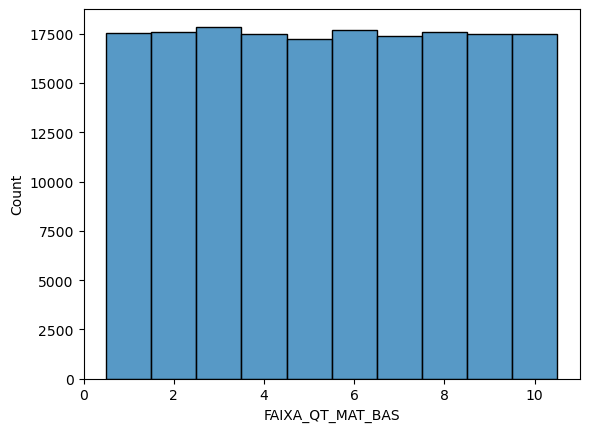

In [707]:
sns.histplot(df['FAIXA_QT_MAT_BAS'])

### Geração do CSV

In [705]:
df.to_csv('censo_escolar_2023_mod.csv')